<a href="https://colab.research.google.com/github/VilasSonawane/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Vilas_Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, **you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments.** The data is vizualized as it becomes easy to analyse data at instant. **The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.**

This could help in **clustering the restaurants into segments**. **Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis**

**Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# **Question to be answered during Project**

# 1.Analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations.
# 2..cluster the zomato restaurants into different segments. 
# 3. The customers finding the Best restaurant in their locality and for the company to grow up 
# 4. The Analysis also solve some of the business cases that can directly helpand work on the fields they are currently lagging in.
# 5. Finding Current Buisness problem and Recomendation for Zommatoo To increse its buisness.
# 6. Clustering restarants into segments  
# 7. information around cuisine and costing which can be used in cost vs. benefit analysis
# 8. Sentiment analysis of custmer review
# 9. Identifying the critics in the industry based on the metadata of reviewers.

# **Trends/ Insights to be Explore**
# 1. Top 10 Restaurant costiler, cheapesst, afoordable
# 2. Top 10 Cuisines
# 3. Top 10 in different categories
# 4. Explore the timing columns
# 5. Most famous Restaurant based on user review /ratings
# 6. Most possitive ratings Most negative ratings
# 7. Top 10 Most active customers(Critics) based Review and follower
# 8. Most Populer Restaurant based no of customer visits etc.  

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
!pip install textblob

In [ ]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import ast
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# library to clean data
import re 
# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer 
# for Calculate Sentiment Polarity
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing the libraries
from urllib.request import urlopen
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
restolist_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant names and Metadata.csv')

In [ ]:
# Defining a function to scrape the content in the website and return the html script of the page
def send_request(url):
    response = requests.get(
        url='https://app.scrapingbee.com/api/v1/',
        params={
            'api_key': 'S2X6U0NGJAYG3SLEFPB80L2STD47D3Q7JC8P81J77EYXDS82UE6CBYAZP4AX9O69O0KHHY84U4QCKYTE',
            'url': url,  
        },
        
    )
    #print('Response HTTP Status Code: ', response.status_code)
    #print('Response HTTP Response Body: ', response.content)
    return response

In [ ]:
# Creating a new column to store the html string of each url
restolist_df['content'] = np.nan

In [ ]:
# Scraping through each url and storing the html string in the content column of the data frame
#for i,url in enumerate(names_df['Links']):
#  response = send_request(url)
#  content = response.content
#  names_df.loc[i,'content'] = str(content)

In [ ]:
# Writing the dataframe to a csv to ensure no data loss in working
#names_df.to_csv('/content/drive/MyDrive/Data Squad zomato/Nandeesh/names_df_v2')

In [ ]:
names_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato_restaurant_names_new.csv')

In [ ]:
# checking for null entries
sum(names_df['content'].isnull())

0

In [ ]:
names_df['content'][0]

'b\'<!DOCTYPE html><html lang="en" data-rh="lang"><head>\\n      <meta name="viewport" content="width=device-width, initial-scale=1">\\n      <link rel="preconnect" href="https://googleads.g.doubleclick.net">\\n      <link rel="preconnect" href="https://jumbo.zomato.com">\\n      <link rel="preconnect" href="https://accounts.google.com">\\n      <link rel="preconnect" href="https://securepubads.g.doubleclick.net">\\n      <link rel="preconnect" href="https://www.google-analytics.com">\\n      <link rel="preconnect" href="https://www.googleadservices.com">\\n      <link rel="preconnect" href="https://bat.bing.com">\\n      <link rel="preconnect" href="https://8391443.fls.doubleclick.net">\\n      <title> \\nBeyond Flavours, Gachibowli, Hyderabad - Restaurant\\n</title>\\n      <meta data-rh="true" charset="utf-8"><meta data-rh="true" name="robots" content="NOODP,NOYDIR"><meta data-rh="true" name="description" content=" \\nBeyond Flavours Hyderabad; Beyond Flavours, Gachibowli; Get Menu,

In [ ]:
# checking for null entries
sum(names_df['content'].isnull())

0

In [ ]:
# Picking the latitude and longitude of the restaurants location
for i, content in enumerate(names_df['content']):
  # updating the string to a soup string to easily parse
  soup = str(BeautifulSoup(names_df.loc[i,'content'],"html.parser"))

  # Parsing the latitude and longitude
  tmp = list(re.finditer('https://maps.zomato.com/',soup))
  if len(tmp) == 0:
    names_df.loc[i,'latitude'] = np.nan
    names_df.loc[i,'longitude'] = np.nan
  else:
    loc = tmp[0].span()[0]
    geo_loc = re.findall('=.+&map',soup[loc:loc+200])[0][1:-4]
    names_df.loc[i,'latitude'] = geo_loc.split(',')[0]
    names_df.loc[i,'longitude'] = geo_loc.split(',')[1]

  # Parsing the List of additional services( as a dictionary item in the dataframe column)
  tmp_loc = re.search("More Info",str(soup))
  if tmp_loc==None:
    names_df.loc[i,'additional_services'] = np.nan
  else:
    more_loc = tmp_loc.span()[0]
    tmp = soup[more_loc:]
    inds = list(re.finditer('color="#4F4F4F"',tmp))
    services = list()
    for ind in inds:
      loc = ind.span()[0]
      services.append(re.findall('>.+</p',tmp[loc:loc+50])[0][1:-3])
    names_df.loc[i,'additional_services'] = str(services)
    
  # Identifying if the restaurant has featured in any of the best lists of the city - binary variable = 1 if featured, 0 otherwise
  names_df.loc[i,'Has_Featured'] = int(len(list(re.finditer('Featured In',soup)))>0)

  # Identifying what people associate this restaurant for
  inds = list(re.finditer("People Say This Place Is Known For",str(soup)))
  if len(inds) == 0:
    names_df.loc[i,'People say this is known for'] = np.nan
  else:
    ind = inds[0].span()[0]
    tmp = soup[ind:ind+500]
    names_df.loc[i,'People say this is known for']=re.findall('color="#4F4F4F">.+</p><h3',tmp)[0][16:-7]

In [ ]:
# dropping the content column
names_df.drop('content',axis = 1,inplace = True)

In [ ]:
names_df.to_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato_restaurant_names_new1.csv')

In [ ]:
names_df.head()

Unnamed: 0                            Name  \
0           0                 Beyond Flavours   
1           1                        Paradise   
2           2                        Flechazo   
3           3  Shah Ghouse Hotel & Restaurant   
4           4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings       latitude  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  17.4288789799   
1                                     11 AM to 11 PM  17.4423818301   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  17.4352545759   
3                                    12 Noon to 2 AM  17.4267217841   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  17.4401549529   

       longitude                                additional_services  \
0  78.3739606768  ['Home Delivery', 'Takeaway Available', 'Seati...   
1  78.3565796167  ['Home Delivery', 'Takeaway Available', 'Valet...   
2  78.3680872992  ['Home Delivery', 'Takeaway Available', 'Free ...   
3  78.3764155582  ['Home Delivery', 'Takeaway Available', 'Indoo...   
4  78.3619356528  ['Home Delivery', 'Full Bar Available', 'Free ...   

   Has_Featured                       People say this is known for  
0           0.0  Ambience and Service, Courteous Staffs, Cozy, ...  
1           1.0  Good Food Service, Good for Large Groups, Happ...  
2           1.0  Value of Money Food, Good for Large Groups, Co...  
3           1.0  Delivered on Time, Big Restaurant, Food was Go...  
4           1.0  Music and Feel, Good Food and Good Service, Am...

# **Data Exploration**

In [ ]:
names_df.shape

(105, 12)

In [ ]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    105 non-null    int64  
 1   Name                          105 non-null    object 
 2   Links                         105 non-null    object 
 3   Cost                          105 non-null    object 
 4   Collections                   51 non-null     object 
 5   Cuisines                      105 non-null    object 
 6   Timings                       104 non-null    object 
 7   latitude                      104 non-null    object 
 8   longitude                     104 non-null    object 
 9   additional_services           104 non-null    object 
 10  Has_Featured                  105 non-null    float64
 11  People say this is known for  96 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.0+ KB


In [ ]:
# changing the data type of the cost function
names_df['Cost'] = names_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
float(names_df['latitude'][0])

17.4288789799

In [ ]:
for i in names_df.index:
  names_df['latitude'][i]=float(names_df['latitude'][i])

In [ ]:
for i in names_df.index:
  names_df['longitude'][i] = float(names_df['longitude'][i])

In [ ]:
names_df.latitude.nunique()

104

## **So there is lot of variation and overlapping and its showing non uniformity in timing of the restaurants so then it will practically no use of this columns for clustering also and for exploratery data analysis.** 

In [ ]:
# Cleaning the 'People say this is known for' column
names_df['known_for'] = names_df['People say this is known for'].replace(np.nan,'')

In [ ]:
# Some observations in this column has extra unnecessary text that starts with 'class='. Identifying them and removing
bool_series = names_df['known_for'].str.contains('class=')
for i in names_df.loc[bool_series].index:
  tmp = names_df.iloc[i]['known_for']
  names_df.at[i,'known_for'] = tmp[:tmp.find('<')]

In [ ]:
# spliting the cuisine and storing in list 
def make_list(text):
   my_list = list(set(text.split(', ')))
   return my_list

In [ ]:
names_df['known_for']=names_df['known_for'].apply(make_list)
names_df['Cuisines']=names_df['Cuisines'].apply(make_list)

In [ ]:
# Replacing nan values with an empty list in additional_services column
names_df['additional_services'] = names_df['additional_services'].replace(np.nan,'[]')

In [ ]:
# lets convert string type column into list
for i in names_df.index:
 names_df['additional_services'][i] = ast.literal_eval(names_df['additional_services'][i])

In [ ]:
new_names_df = names_df.copy()

In [ ]:
# lets drop unnecessary columns from dataset
new_names_df.drop(['Unnamed: 0', 'Links','Timings','Collections', 'People say this is known for'], axis=1, inplace = True)

In [ ]:
new_names_df=new_names_df.dropna()

In [ ]:
new_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 104 non-null    object 
 1   Cost                 104 non-null    int64  
 2   Cuisines             104 non-null    object 
 3   latitude             104 non-null    object 
 4   longitude            104 non-null    object 
 5   additional_services  104 non-null    object 
 6   Has_Featured         104 non-null    float64
 7   known_for            104 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ KB


In [ ]:
new_names_df.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines   latitude  longitude  \
0  [Chinese, South Indian, North Indian, European...  17.428879  78.373961   
1                   [Chinese, Biryani, North Indian]  17.442382   78.35658   
2     [Asian, Mediterranean, Desserts, North Indian]  17.435255  78.368087   
3  [Chinese, Biryani, Seafood, North Indian, Beve...  17.426722  78.376416   
4  [Chinese, Asian, North Indian, Mediterranean, ...  17.440155  78.361936   

                                 additional_services  Has_Featured  \
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   
1  [Home Delivery, Takeaway Available, Valet Park...           1.0   
2  [Home Delivery, Takeaway Available, Free Parki...           1.0   
3  [Home Delivery, Takeaway Available, Indoor Sea...           1.0   
4  [Home Delivery, Full Bar Available, Free Parki...           1.0   

                                           known_for  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
1  [Nice Hospitality, Happy Place, Good for Large...  
2  [Value of Money Food, Comfortable Seating Area...  
3  [Big Restaurant, Very Good Service, Food was G...  
4  [Great Host, Ambiance and Music, Good Food and...

In [ ]:
# Transform each element of a list-like to a row 
cuisines=new_names_df.explode(['Cuisines'])
cuisines.head()

Name  Cost      Cuisines   latitude  longitude  \
0  Beyond Flavours   800       Chinese  17.428879  78.373961   
0  Beyond Flavours   800  South Indian  17.428879  78.373961   
0  Beyond Flavours   800  North Indian  17.428879  78.373961   
0  Beyond Flavours   800      European  17.428879  78.373961   
0  Beyond Flavours   800   Continental  17.428879  78.373961   

                                 additional_services  Has_Featured  \
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   

                                           known_for  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...

# **Feature Engineering**

In [ ]:
# List of Unique Cuisines
print(list(set(cuisines['Cuisines'])))

['Chinese', 'Burger', 'Momos', 'Finger Food', 'Hyderabadi', 'Pizza', 'Fast Food', 'North Indian', 'European', 'Wraps', 'Continental', 'Kebab', 'Japanese', 'Italian', 'Mexican', 'Mithai', 'Goan', 'Modern Indian', 'North Eastern', 'Thai', 'Malaysian', 'Healthy Food', 'Asian', 'Biryani', 'Lebanese', 'Indonesian', 'Seafood', 'Arabian', 'American', 'Salad', 'Sushi', 'Cafe', 'Bakery', 'Andhra', 'South Indian', 'Mughlai', 'Ice Cream', 'Street Food', 'Desserts', 'BBQ', 'Spanish', 'Mediterranean', 'Juices', 'Beverages']


In [ ]:
# How Many number of unique cuisines are available in all the restaurants in Hyderabad
len(list(set(cuisines['Cuisines'])))

44

In [ ]:
cuisines.shape

(310, 8)

In [ ]:
# Classifying  all the cuisines into their respective class Indian spicy food, Indian Healthy food, Fast Food, Dessert,Western Food,Eastern Food
food_class=[]
for i in cuisines['Cuisines']:   
  if (i=='Hyderabadi')| (i=='Asian')|(i=='Kebab')|(i=='North Indian')|(i=='Modern Indian')|(i=='BBQ')|(i=='Biryani')|(i=='Mughlai'):
    food_class.append('Indian spicy food')
  if (i=='Andhra')|(i=='North Eastern')|(i=='Salad')|(i=='South Indian')|(i=='Seafood')|(i=='Healthy Food')|(i=='Goan'):
    food_class.append('Indian Healthy food')
  if (i=='Momos')|(i=='Street Food')|(i=='Cafe')|(i=='Chinese')|(i=='Pizza')|(i=='Wraps')|(i=='Burger')|(i=='Fast Food')|(i=='Finger food')|(i=='Sushi'):
    food_class.append('Fast food')
  if (i=='Bakery')|(i=='Beverages')|(i=='Desserts')|(i=='Juices')|(i=='Ice Cream')|(i=='Mithai'):
    food_class.append('Dessert')
  if (i=='Continental')|(i=='Lebanese')|(i=='Italian')|(i=='European')|(i=='Mediterranean')|(i=='American')|(i=='Mexican')|(i=='Spanish'):
    food_class.append('Western Food')
  if (i=='Indonesian')|(i=='Malaysian')|(i=='Thai')|(i=='Arabian')|(i=='Japanese'):
    food_class.append('Eastern Food')  

In [ ]:
# updating the data frame with food Class
cuisine_class=pd.DataFrame(food_class)
cuisine_class.columns=['cuisine']
cuisine_class

cuisine
0              Fast food
1    Indian Healthy food
2      Indian spicy food
3           Western Food
4           Western Food
..                   ...
303            Fast food
304    Indian spicy food
305         Eastern Food
306            Fast food
307         Eastern Food

[308 rows x 1 columns]

In [ ]:
cuisines

Name  Cost      Cuisines   latitude  \
0                           Beyond Flavours   800       Chinese  17.428879   
0                           Beyond Flavours   800  South Indian  17.428879   
0                           Beyond Flavours   800  North Indian  17.428879   
0                           Beyond Flavours   800      European  17.428879   
0                           Beyond Flavours   800   Continental  17.428879   
..                                      ...   ...           ...        ...   
103                             Wich Please   250     Fast Food  17.446881   
104  Republic Of Noodles - Lemon Tree Hotel  1700         Asian  17.423368   
104  Republic Of Noodles - Lemon Tree Hotel  1700     Malaysian  17.423368   
104  Republic Of Noodles - Lemon Tree Hotel  1700       Chinese  17.423368   
104  Republic Of Noodles - Lemon Tree Hotel  1700          Thai  17.423368   

     longitude                                additional_services  \
0    78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0    78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0    78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0    78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0    78.373961  [Home Delivery, Takeaway Available, Seating Av...   
..         ...                                                ...   
103  78.359628                                                 []   
104  78.330975                                                 []   
104  78.330975                                                 []   
104  78.330975                                                 []   
104  78.330975                                                 []   

     Has_Featured                                          known_for  
0             0.0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0             0.0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0             0.0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0             0.0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0             0.0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
..            ...                                                ...  
103           0.0  [Combo, Prices, Portion, Packaging, Great Valu...  
104           0.0  [Attentive Staff, Sophisticated, Serene Ambien...  
104           0.0  [Attentive Staff, Sophisticated, Serene Ambien...  
104           0.0  [Attentive Staff, Sophisticated, Serene Ambien...  
104           0.0  [Attentive Staff, Sophisticated, Serene Ambien...  

[310 rows x 8 columns]

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisines.reset_index(inplace=True)
dataset=pd.concat([cuisines,cuisine_class],axis=1)
dataset.drop(['index'],axis=1,inplace=True)

In [ ]:
# Lets generate Dummy features of Different cuisines using get_dummies for our Cuisine columns
cuisine_dummy= pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [ ]:
cuisine_dummy.head(2)

Name  Cost      Cuisines   latitude  longitude  \
0  Beyond Flavours   800       Chinese  17.428879  78.373961   
1  Beyond Flavours   800  South Indian  17.428879  78.373961   

                                 additional_services  Has_Featured  \
0  [Home Delivery, Takeaway Available, Seating Av...           0.0   
1  [Home Delivery, Takeaway Available, Seating Av...           0.0   

                                           known_for  cuisine_Dessert  \
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...                0   
1  [Courteous Staffs, Fancy Crowd, Beautiful Deco...                0   

   cuisine_Eastern Food  cuisine_Fast food  cuisine_Indian Healthy food  \
0                     0                  1                            0   
1                     0                  0                            1   

   cuisine_Indian spicy food  cuisine_Western Food  
0                          0                     0  
1                          0                     0

In [ ]:
# Transform each element of a list-like to a row 
services=new_names_df.explode(['additional_services'])
services.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   

    latitude  longitude additional_services  Has_Featured  \
0  17.428879  78.373961       Home Delivery           0.0   
0  17.428879  78.373961  Takeaway Available           0.0   
0  17.428879  78.373961   Seating Available           0.0   
0  17.428879  78.373961                Wifi           0.0   
0  17.428879  78.373961              Buffet           0.0   

                                           known_for  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...  
0  [Courteous Staffs, Fancy Crowd, Beautiful Deco...

In [ ]:
services.additional_services.isnull().sum()

24

In [ ]:
services[services.additional_services.isnull()]

Name  Cost  \
12                        Absolute Sizzlers   750   
30                               Pot Pourri   900   
32                     Marsala Food Company   700   
36      Banana Leaf Multicuisine Restaurant   700   
39                            Deli 9 Bistro   700   
40                              Frio Bistro  1200   
43               The Foodie Monster Kitchen   500   
45                              Owm Nom Nom   900   
49                            Mathura Vilas   500   
53                          Diners Pavilion  1200   
54                           Asian Meal Box   200   
64                          Hyderabad Chefs   600   
78                               Khaan Saab  1100   
79                             Olive Garden   700   
80                      Tandoori Food Works   500   
81                                 Delhi-39   600   
86                       The Chocolate Room   600   
87                      American Wild Wings   600   
90                             Arena Eleven  1600   
96                        Hyderabadi Daawat   600   
98                                 Triptify   400   
100                               IndiBlaze   600   
103                             Wich Please   250   
104  Republic Of Noodles - Lemon Tree Hotel  1700   

                                              Cuisines   latitude  longitude  \
12                    [American, Chinese, Continental]  17.452431  78.363024   
30                [South Indian, Andhra, North Indian]  17.442573  78.354857   
32                    [Arabian, Chinese, North Indian]  17.448632  78.356431   
36   [Chinese, Andhra, South Indian, Biryani, North...  17.443786  78.362699   
39                       [Cafe, Continental, Desserts]  17.424294  78.344127   
40           [European, Spanish, Continental, Italian]  17.429246  78.373874   
43                         [American, Wraps, Desserts]  17.448571  78.356373   
45            [Andhra, Chinese, Biryani, North Indian]  17.448747  78.357501   
49               [South Indian, Chinese, North Indian]   17.44011  78.362308   
53                     [Chinese, Continental, Italian]  17.442819  78.355434   
54                                             [Asian]   17.45243  78.363027   
64                             [Chinese, North Indian]  17.448595  78.357792   
78                             [Mughlai, North Indian]  17.437999  78.365579   
79       [Biryani, Chinese, Continental, North Indian]  17.442767  78.355793   
80                       [Kebab, Burger, North Indian]  17.452436  78.363022   
81                             [Chinese, North Indian]  17.432748  78.369742   
86                                    [Cafe, Desserts]  17.441675  78.358135   
87                [American, Salad, Fast Food, Burger]  17.442399  78.355512   
90                                       [Continental]  17.452436  78.363011   
96                      [Mughlai, Chinese, Hyderabadi]  17.450008  78.363755   
98                                      [North Indian]  17.448559  78.356378   
100                                 [Salad, Fast Food]  17.448603  78.361134   
103                                        [Fast Food]  17.446881  78.359628   
104                  [Asian, Malaysian, Chinese, Thai]  17.423368  78.330975   

    additional_services  Has_Featured  \
12                  NaN           0.0   
30                  NaN           0.0   
32                  NaN           0.0   
36                  NaN           0.0   
39                  NaN           0.0   
40                  NaN           0.0   
43                  NaN           0.0   
45                  NaN           0.0   
49                  NaN           0.0   
53                  NaN           0.0   
54                  NaN           0.0   
64                  NaN           0.0   
78                  NaN           0.0   
79                  NaN           0.0   
80                  NaN           0.0   
81                  NaN           0.0   
86             

In [ ]:
print(set(services['additional_services']))

{nan, 'Craft Beer', 'Available for Functions', 'Breakfast', 'Group Meal', 'Live Entertainment', 'Takeout Available', 'Outdoor Seating', 'Indoor Seating', 'Happy Hours', 'Restricted Entry', 'Serves Alcohol', 'Free Wifi', 'No Alcohol Available', 'Delivery Only', 'High Chair Available', 'Dance Floor', 'Wheelchair Accessible', 'Dress Code Applicable', 'Pet Friendly', 'Desserts and Bakes', 'Brunch', 'Family Friendly', 'Luxury Dining', 'Table Reservation Not Required', 'Kid Friendly', 'Free Parking', 'Shared Seating Area', 'Valet Parking Available', 'Wifi', 'Buffet', 'Vegetarian Only', 'Takeaway Available', 'Standing Tables', 'Romantic Dining', 'Table reservation required', 'Mall Parking', 'Private Dining Area Available', 'Gaming Area', 'Disabled Friendly', 'Home Delivery', 'Nightlife', 'Table booking recommended', 'Seating Available', 'Live Music', 'Rooftop', 'Smoking Area', 'Full Bar Available', 'Serves Cocktails', 'Work Friendly', 'No Seating Available', 'Live Sports Screening'}


In [ ]:
services.shape

(525, 8)

In [ ]:
# How Many number of unique Services are offered by different restaurants in Hyderabad
len(list(set(services['additional_services'])))

52

In [ ]:
# Transform each element of a list-like to a row 
known_for=new_names_df.explode(['known_for'])
known_for.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   
0  Beyond Flavours   800  [Chinese, South Indian, North Indian, European...   

    latitude  longitude                                additional_services  \
0  17.428879  78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0  17.428879  78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0  17.428879  78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0  17.428879  78.373961  [Home Delivery, Takeaway Available, Seating Av...   
0  17.428879  78.373961  [Home Delivery, Takeaway Available, Seating Av...   

   Has_Featured             known_for  
0           0.0      Courteous Staffs  
0           0.0           Fancy Crowd  
0           0.0       Beautiful Decor  
0           0.0  Ambience and Service  
0           0.0                  Cozy

In [ ]:
known_for.known_for.isnull().sum()

0

In [ ]:
known_for.shape

(584, 8)

In [ ]:
print(set(known_for['known_for']))

{'Great Recommendations', 'Elegantly Decorated', '', 'Decor', 'Nice Place', 'Affordable Prices', 'Music', 'Private Dining Area', 'Great Price', 'Friendly Place', 'Great Food', 'Presentation', 'Tandoori', 'Excellent Food and Service', 'Outdoor Seating', 'Worth the Money', 'Cooking Stations', 'Decent Music', 'Good Delivery', 'Dim Lighting', 'Interior', 'Nice Hospitality', 'Courteous Staff', 'Food', 'Behavior', 'Very Good Service', 'Best Customer Service', 'On Time Delivery', 'Ample Seating Area', 'Service is Great', 'Good Food', 'Themed Ambiance', 'Friendly Staff Loved it', 'Pocket Friendly Restaurant', 'Sound System', 'Polite Service', 'Combo', 'Lights', 'Attentive Staff', 'Value of Money Food', 'Good Food and Good Service', 'Luxury', 'Host', 'Decent Place', 'Main Course', 'Good Quality Food', 'Dining Room', 'Taste', 'Seating Arrangement', 'Good Bartenders', 'Nice Taste', 'Hygienic', 'Good View', 'Breakfast Options', 'Cozy Ambience', 'Nice Staff', 'Portion Size', 'Favorite Place', 'Soph

In [ ]:
# How Many number of unique Services are offered by different restaurants in Hyderabad
len(list(set(known_for['known_for'])))

283

# **Univariate Analysis**

Text(0.5, 1.0, 'Count of Restaurants according Per person estimated Cost of dining @ diffrent Restaurants in Hyderabad')

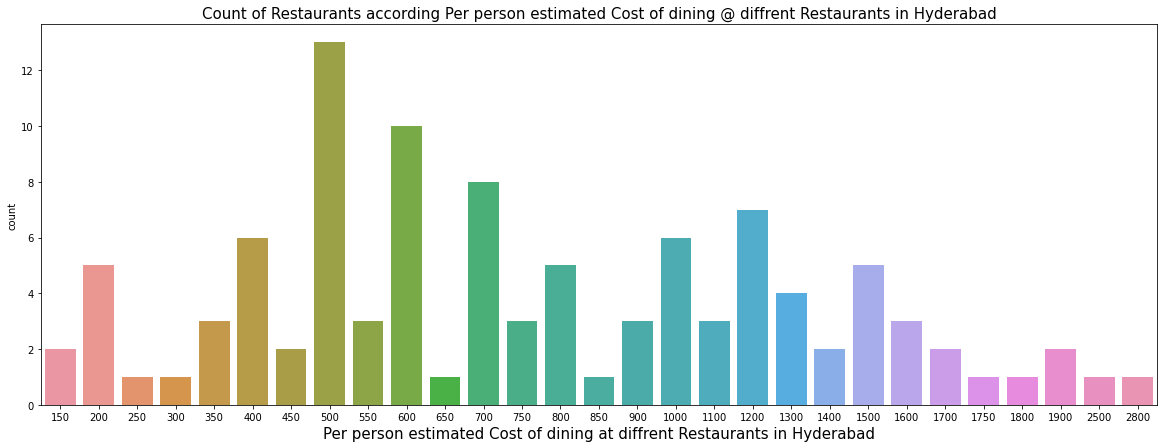

In [ ]:
# Count of Restaurants according Per person estimated Cost of dining @ diffrent Restaurants in Hyderabad
plt.figure (figsize = (20,7))
p=sns.countplot(names_df.Cost)
p.set_xlabel("Per person estimated Cost of dining at diffrent Restaurants in Hyderabad",fontsize = 15)
plt.title("Count of Restaurants according Per person estimated Cost of dining @ diffrent Restaurants in Hyderabad",fontsize = 15)

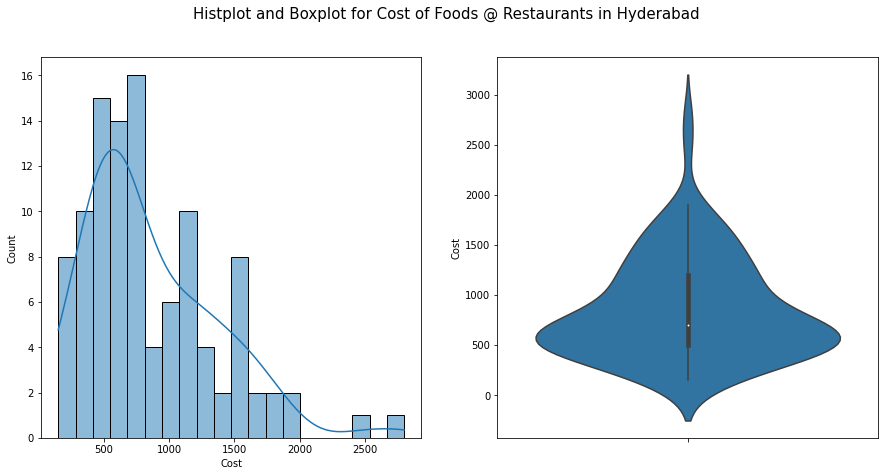

In [ ]:
## Finding Cost distribution of Food Prices @ diffrent Restaurants in Hyderabad
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histplot and Boxplot for Cost of Foods @ Restaurants in Hyderabad',fontsize = 15)
# HIstplot
sns.histplot(ax=axes[0], data=names_df, x="Cost", bins=20,kde=True)
# BoxPlot
sns.violinplot(ax=axes[1],data=names_df, y="Cost",showmeans=True)

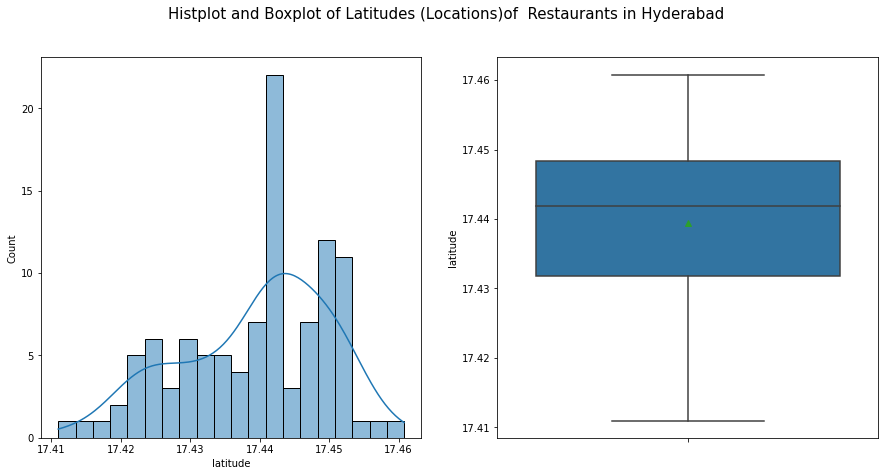

In [ ]:
## 'Histplot and Boxplot of Latitudes (Locations)of  Restaurants in Hyderabad'
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histplot and Boxplot of Latitudes (Locations)of  Restaurants in Hyderabad',fontsize = 15)
# HIstplot
sns.histplot(ax=axes[0], data=names_df, x="latitude", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=names_df, y="latitude",showmeans=True)

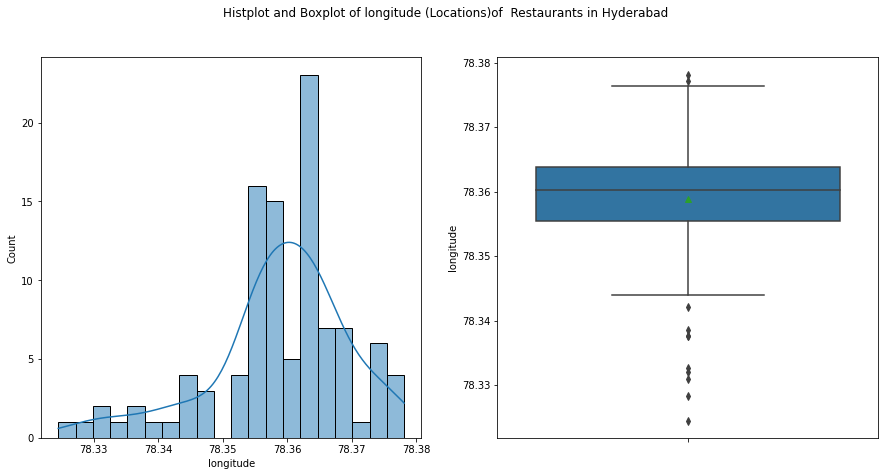

In [ ]:
## 'Histplot and Boxplot of longitude (Locations)of  Restaurants in Hyderabad'
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Histplot and Boxplot of longitude (Locations)of  Restaurants in Hyderabad')
# HIstplot
sns.histplot(ax=axes[0], data=names_df, x="longitude", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=names_df, y="longitude",showmeans=True)

# **Multivariate Analysis**

Text(0.5, 1.0, 'Per person estimated Cost of dining at different Location of Restaurants In Hyderabad')

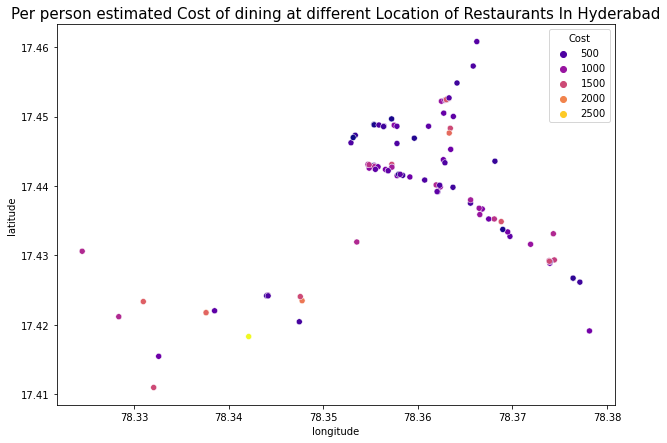

In [ ]:
# Per person estimated Cost of dining at different Location of Restaurants In Hyderabad
plt.figure(figsize=(10,7))
sns.scatterplot(y="latitude", x="longitude",
                hue="Cost", palette="plasma",data=names_df)
plt.title('Per person estimated Cost of dining at different Location of Restaurants In Hyderabad',fontsize = 15)

In [ ]:
!pip install  geopandas

     |████████████████████████████████| 1.0 MB 7.2 MB/s 
     |████████████████████████████████| 16.7 MB 276 kB/s 
     |████████████████████████████████| 6.3 MB 34.6 MB/s 


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [ ]:
gdf = geopandas.GeoDataFrame(
    names_df, geometry=geopandas.points_from_xy(names_df.longitude, names_df.latitude))

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    105 non-null    int64   
 1   Name                          105 non-null    object  
 2   Links                         105 non-null    object  
 3   Cost                          105 non-null    int64   
 4   Collections                   51 non-null     object  
 5   Cuisines                      105 non-null    object  
 6   Timings                       104 non-null    object  
 7   latitude                      104 non-null    object  
 8   longitude                     104 non-null    object  
 9   additional_services           105 non-null    object  
 10  Has_Featured                  105 non-null    float64 
 11  People say this is known for  96 non-null     object  
 12  known_for                     105 non-null

In [ ]:
x= gdf.loc[0:,['Name','latitude','longitude','geometry']]

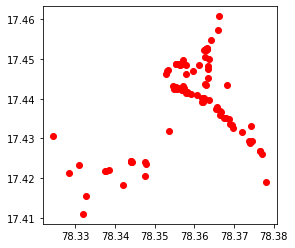

<Figure size 720x504 with 0 Axes>

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'India'].plot(
    color='white', edgecolor='black')
plt.figure(figsize=(10,7))
# We can now plot our ``GeoDataFrame``.
x.plot(ax=ax, color='red')

plt.show()

In [ ]:
! pip install folium

In [ ]:
x=names_df[~names_df.latitude.isnull()]

In [ ]:
import folium
mapit = folium.Map(location=[17.3850, 78.4867])
for i in x.index:
    folium.Marker( location=[ x.latitude[i], x.longitude[i] ]).add_to( mapit )
mapit.save( 'map.html')

In [ ]:
mapit

In [ ]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [ ]:
import folium
m2=folium.Map(location=[17.3850, 78.4867],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m2)
m2
for i in x.index:
    folium.Marker( location=[ x.latitude[i], x.longitude[i] ]).add_to(m2)
m2.save( 'map.html')

In [ ]:
m2

# **Top 10 Most Expensive restaurant Hyderabad.**

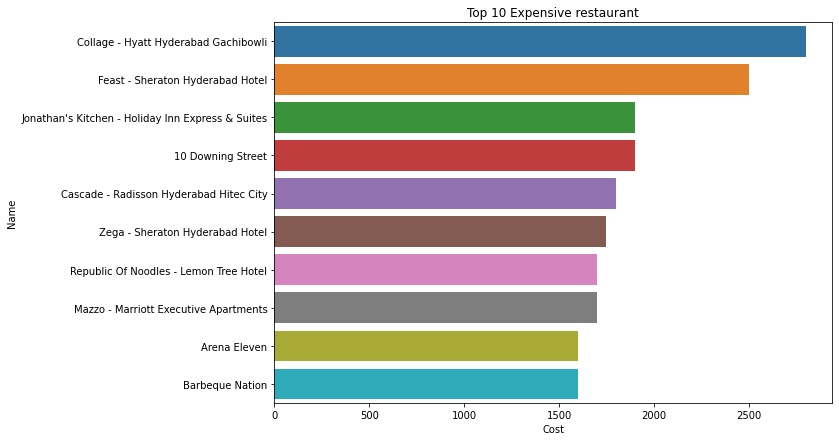

In [ ]:
# checking for most expensive Restaurant
plt.figure(figsize=(10,7))
plot = sns.barplot(x='Cost',
            y="Name", 
            data=names_df, 
            order=names_df.sort_values('Cost',ascending=False).Name[:10])
# plt.setp(plot.get_xticklabels(), rotation = 90)
plt.title('Top 10 Expensive restaurant')
plt.show()

# **10 Most Affordable restaurant Restaurant in Hyderabad**

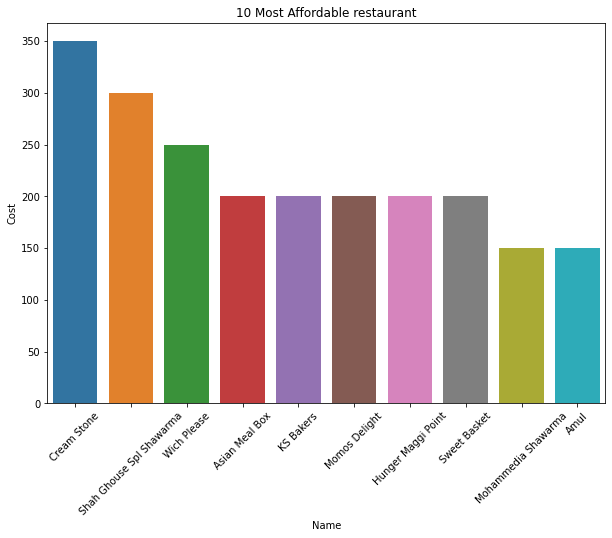

In [ ]:
# checking for 10 Most Affordable restaurant Restaurant
plt.figure(figsize=(10,7))
plot = sns.barplot(y='Cost',
            x="Name", 
            data=names_df, 
            order=names_df.sort_values('Cost',ascending=False).Name[-10:])
plt.setp(plot.get_xticklabels(), rotation = 45)
plt.title('10 Most Affordable restaurant')
plt.show()

In [ ]:
# storing all the cusines in a dict 
cuis_dict = {}
for i in names_df.index:
    for name in names_df.Cuisines[i]:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1

In [ ]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

In [ ]:
cuisine_df=cuisine_df.sort_values(by=['Number of Restaurants'],ascending = False)
cuisine_df.head(10)

Cuisine  Number of Restaurants
2   North Indian                     61
0        Chinese                     43
4    Continental                     21
6        Biryani                     16
18     Fast Food                     15
7          Asian                     15
21       Italian                     14
9       Desserts                     13
1   South Indian                      9
29        Bakery                      7

# **Top 10 most served cusines in restaurants of Hyderabad**

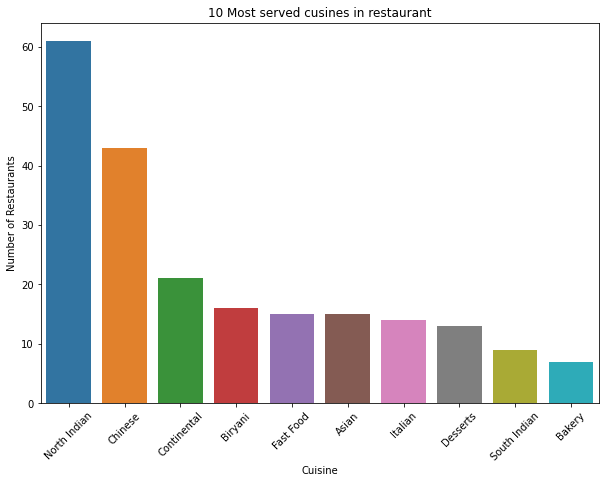

In [ ]:
# graph for most cusines served in restaurant
plt.figure(figsize= (10,7))
plot = sns.barplot(x='Cuisine',
            y="Number of Restaurants", 
            data=cuisine_df, 
            order=cuisine_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:10])
plt.setp(plot.get_xticklabels(), rotation = 45)
plt.title('10 Most served cusines in restaurant')
plt.show()

In [ ]:
# spliting the cusines and storing in list 
Collections_list=names_df.Collections.dropna().str.split(', ')


In [ ]:
# storing all the cusines in a dict 
Collections_dict = {}
for names in Collections_list:
    for name in names:
        if (name in Collections_dict):
            Collections_dict[name]+=1
        else:  
            Collections_dict[name]=1

In [ ]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Taggs', 0:'Number of Restaurants'}).sort_values(by=['Number of Restaurants'],ascending = False)
Collections_df.head()

Taggs  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

# **10 Most used Taggs By restaurants in Hyderabad**

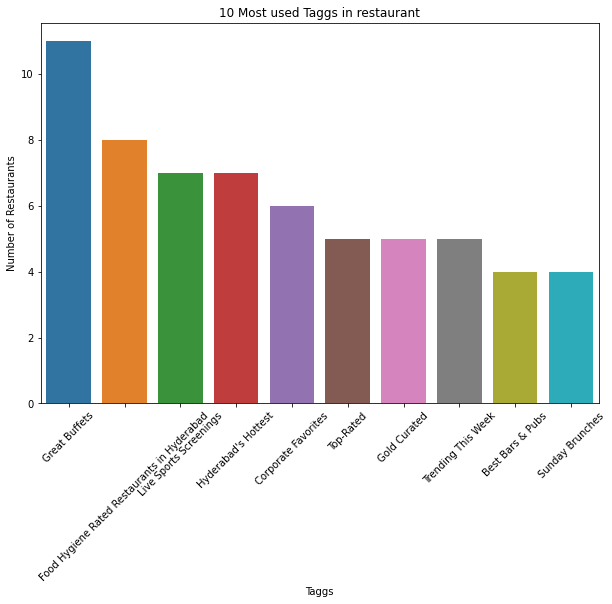

In [ ]:
# graph for 10 Most used Taggs in restaurant 
plt.figure(figsize= (10,7))
plot =sns.barplot(x='Taggs',
            y="Number of Restaurants", 
            data=Collections_df, 
            order=Collections_df.sort_values('Number of Restaurants',ascending=False).Taggs[:10])
plt.setp(plot.get_xticklabels(), rotation = 45)
plt.title('10 Most used Taggs in restaurant')
plt.show()

# **Clustering Based on the Location of Restaurants**

In [ ]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    105 non-null    int64   
 1   Name                          105 non-null    object  
 2   Links                         105 non-null    object  
 3   Cost                          105 non-null    int64   
 4   Collections                   51 non-null     object  
 5   Cuisines                      105 non-null    object  
 6   Timings                       104 non-null    object  
 7   latitude                      104 non-null    object  
 8   longitude                     104 non-null    object  
 9   additional_services           105 non-null    object  
 10  Has_Featured                  105 non-null    float64 
 11  People say this is known for  96 non-null     object  
 12  known_for                     105 non-null    obje

In [ ]:
names_df.isnull().sum()

Unnamed: 0                       0
Name                             0
Links                            0
Cost                             0
Collections                     54
Cuisines                         0
Timings                          1
latitude                         1
longitude                        1
additional_services              0
Has_Featured                     0
People say this is known for     9
known_for                        0
geometry                         0
dtype: int64

In [ ]:
clust1=names_df.loc[0:,['Name','latitude','longitude']].set_index('Name')

In [ ]:
clust1.dropna(inplace=True)

In [ ]:
clust1.isnull().sum()

latitude     0
longitude    0
dtype: int64

In [ ]:
# Lets standerdize the data for Uniformity of values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cluster=sc.fit_transform(clust1)
cluster

array([[-0.99090287,  1.42026472],
       [ 0.28392418, -0.20816943],
       [-0.38897201,  0.86998709],
       [-1.19456739,  1.65026293],
       [ 0.07368092,  0.2936384 ],
       [-2.67901513, -2.50426618],
       [ 1.6888824 ,  0.66078269],
       [-1.19308754,  1.6504514 ],
       [ 1.21126504,  0.34609656],
       [ 0.33917107, -0.32084277],
       [ 0.20353559, -0.03760189],
       [-1.42216435, -1.37588176],
       [ 1.23267461,  0.39560199],
       [ 1.24732007,  0.41809303],
       [ 0.35248792, -0.14560116],
       [ 0.31671973, -0.14412022],
       [ 1.23983126,  0.40468008],
       [ 0.0413681 ,  0.46049933],
       [ 1.24783342,  0.41460629],
       [-1.24732879,  1.71754758],
       [-0.1739516 ,  0.63376831],
       [-1.49923873, -1.03386713],
       [-0.42457747,  0.93815128],
       [ 0.89576518, -0.32313762],
       [ 0.34193542, -0.37562719],
       [ 0.32067572, -0.31786039],
       [ 0.31511921, -0.14474846],
       [-0.01812389,  0.30965856],
       [ 0.89002767,

In [ ]:
new_df = pd.DataFrame(cluster , columns= clust1.columns.to_list())
new_df.head()

latitude  longitude
0 -0.990903   1.420265
1  0.283924  -0.208169
2 -0.388972   0.869987
3 -1.194567   1.650263
4  0.073681   0.293638

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from scipy.spatial.distance import cdist

In [ ]:
#  fitting multiple k-means algorithms and storing the values in an empty list
inertia=[]
silhouette_scorelist = []
distortions = []
for i in range(1,11):
  kmeans= KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(new_df)
  inertia.append(kmeans.inertia_)
  y_kmeans = kmeans.predict(new_df)
  distortions.append(sum(np.min(cdist(new_df, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / new_df.shape[0])
  if i >1:
    silhouette_avg = silhouette_score(new_df, y_kmeans)
    silhouette_scorelist.append(silhouette_avg)

In [ ]:
df= pd.DataFrame({'No_cluster': range(1,11),'Inertia' : inertia, 'Distortions' : distortions})

df1= pd.DataFrame({'No_cluster': range(2,11),'Inertia' : inertia[1:], 'silhouette_score': silhouette_scorelist , 'Distortions' : distortions[1:]})

In [ ]:
df

No_cluster     Inertia  Distortions
0           1  208.000000     1.167402
1           2   91.376258     0.811447
2           3   40.851704     0.560356
3           4   27.915488     0.424182
4           5   21.483208     0.357128
5           6   15.896088     0.320353
6           7   12.901190     0.271646
7           8   10.329397     0.235867
8           9    8.746272     0.221814
9          10    7.942523     0.219081

In [ ]:
df1

No_cluster    Inertia  silhouette_score  Distortions
0           2  91.376258          0.637160     0.811447
1           3  40.851704          0.596808     0.560356
2           4  27.915488          0.546304     0.424182
3           5  21.483208          0.540485     0.357128
4           6  15.896088          0.529371     0.320353
5           7  12.901190          0.520350     0.271646
6           8  10.329397          0.563161     0.235867
7           9   8.746272          0.557881     0.221814
8          10   7.942523          0.546352     0.219081

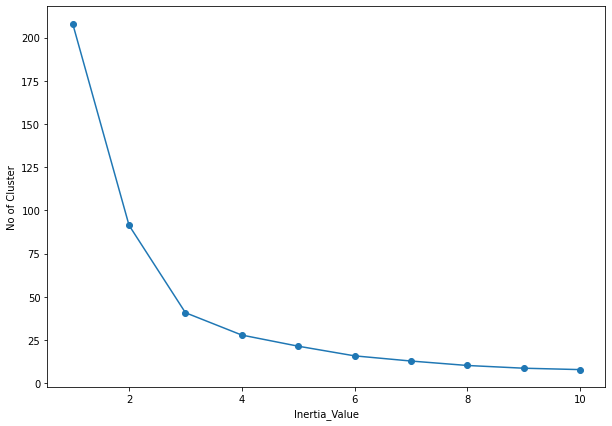

In [ ]:
# Inertia Score
plt.figure(figsize = (10,7))
plt.plot(df.No_cluster,df.Inertia, marker = 'o')
plt.xlabel('Inertia_Value')
plt.ylabel('No of Cluster')
plt.show()

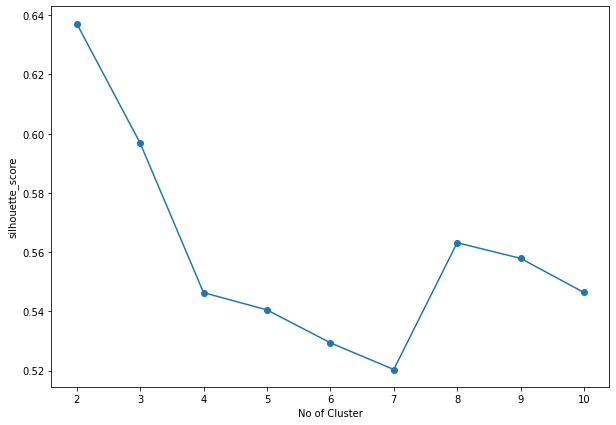

In [ ]:
# silhouette_score 
plt.figure(figsize = (10,7))
plt.plot(df1.No_cluster,df1.silhouette_score, marker = 'o')
plt.ylabel('silhouette_score')
plt.xlabel('No of Cluster')
plt.show()

In [ ]:
X =cluster

For n_clusters = 2 The average silhouette_score is : 0.6371597209436922
For n_clusters = 3 The average silhouette_score is : 0.5968079274777695
For n_clusters = 4 The average silhouette_score is : 0.5463044713144974
For n_clusters = 5 The average silhouette_score is : 0.5448191612164694
For n_clusters = 6 The average silhouette_score is : 0.5257634392808858
For n_clusters = 7 The average silhouette_score is : 0.5169435317006704
For n_clusters = 8 The average silhouette_score is : 0.5631606795220621
For n_clusters = 9 The average silhouette_score is : 0.5679334654455445
For n_clusters = 10 The average silhouette_score is : 0.564966200913796


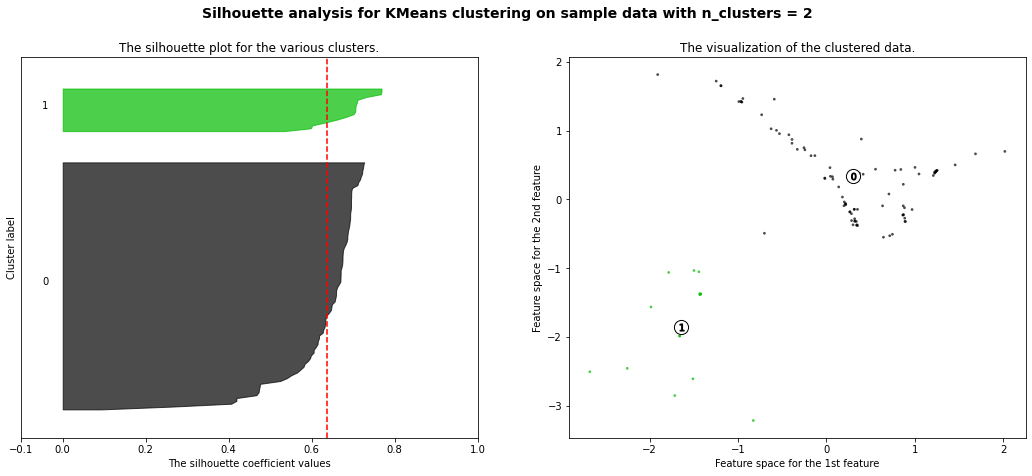

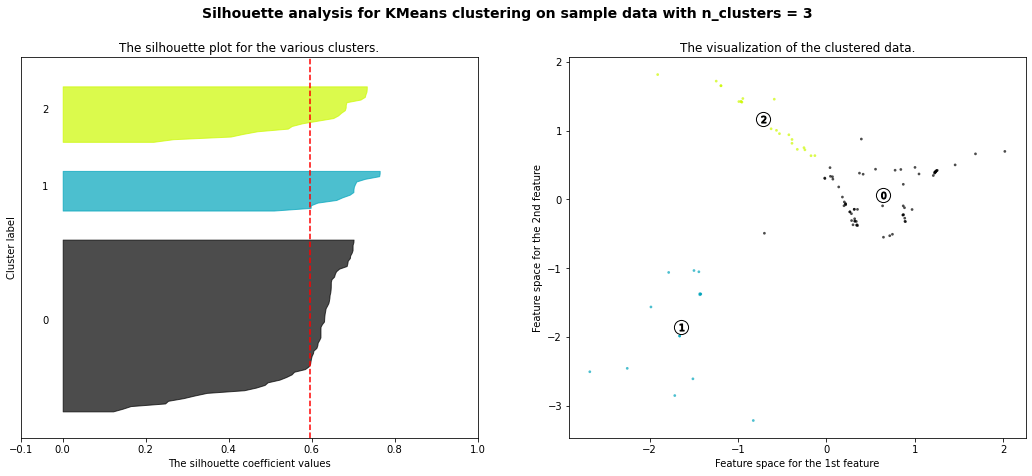

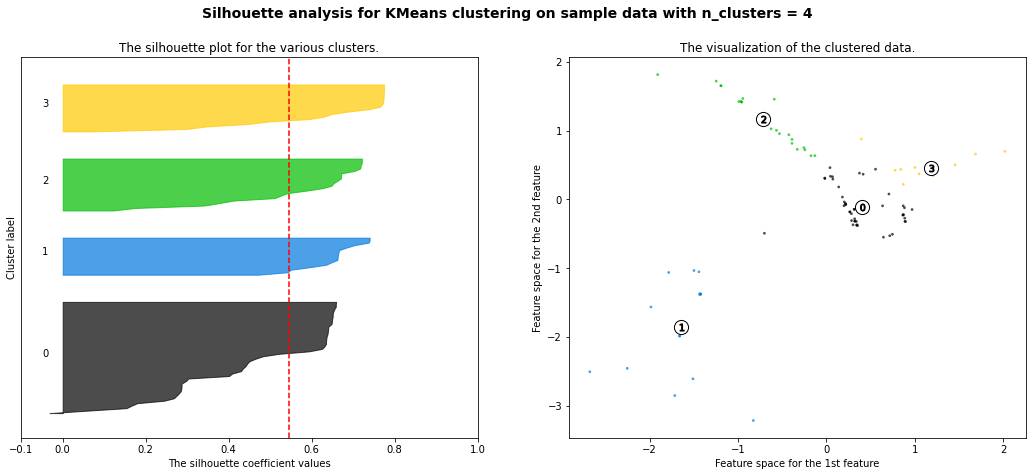

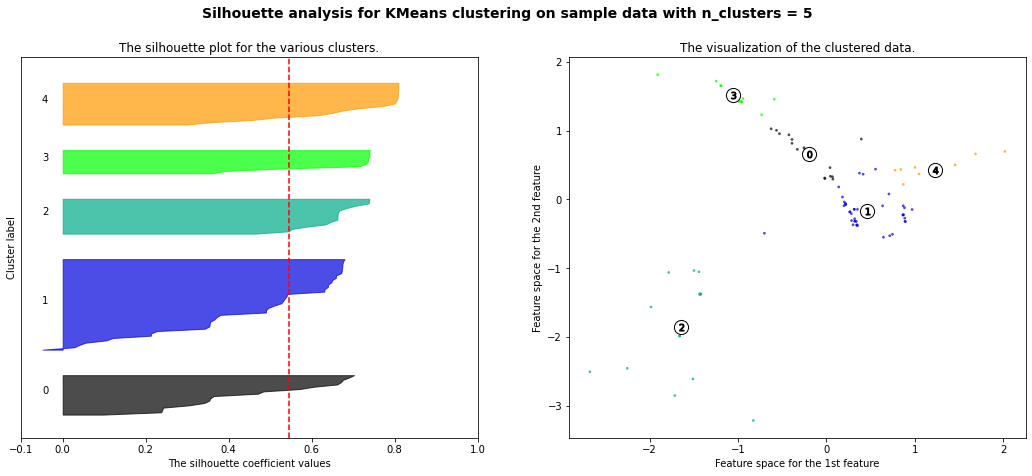

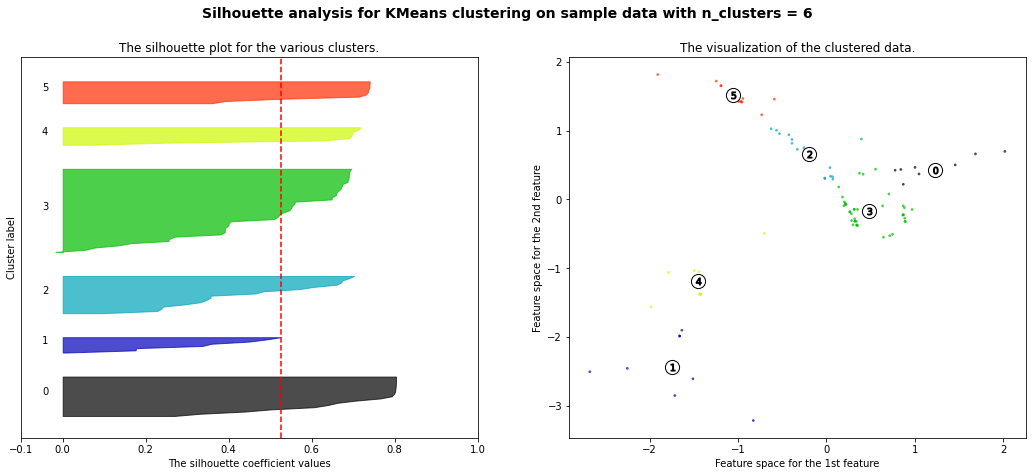

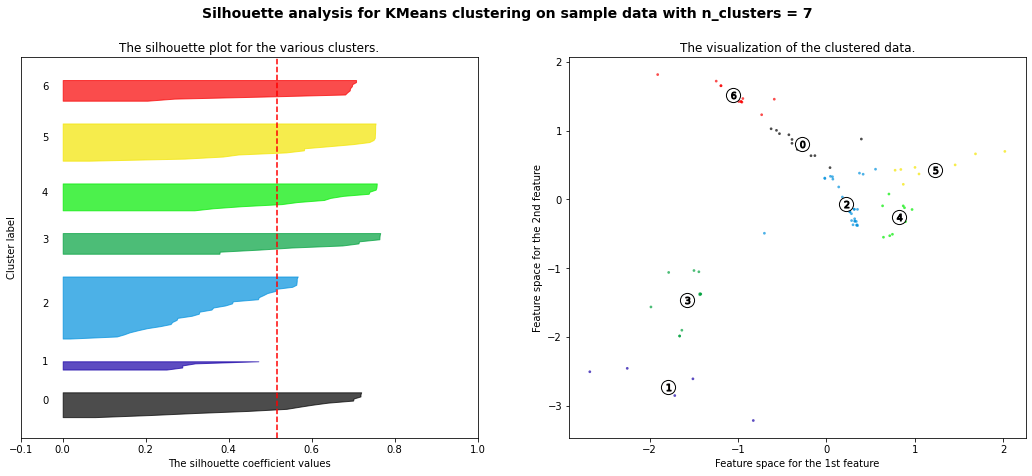

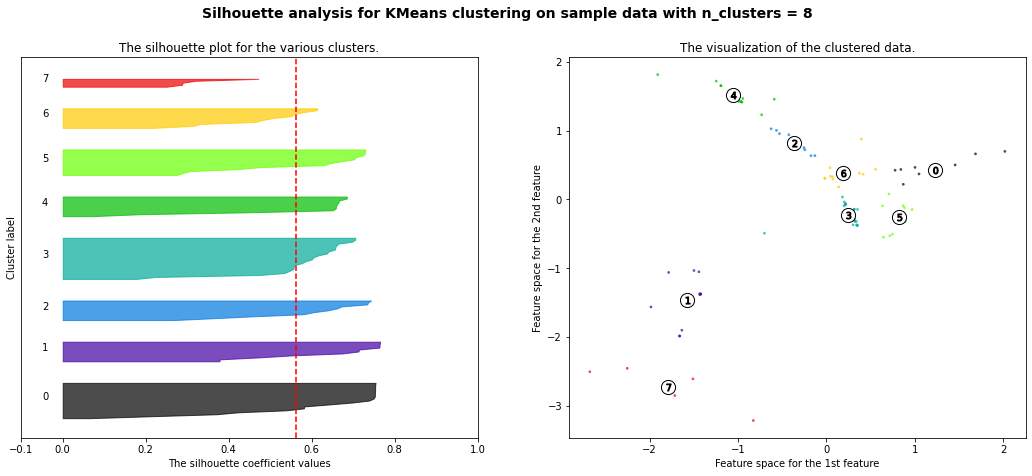

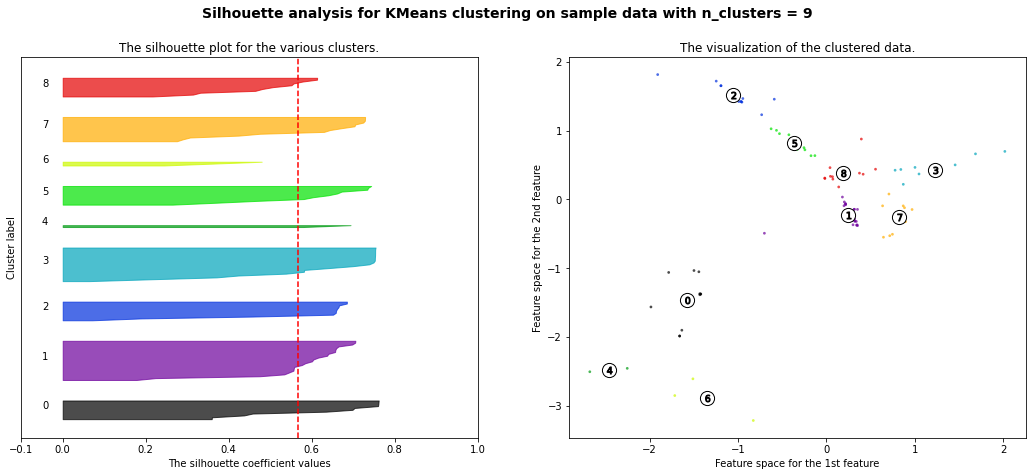

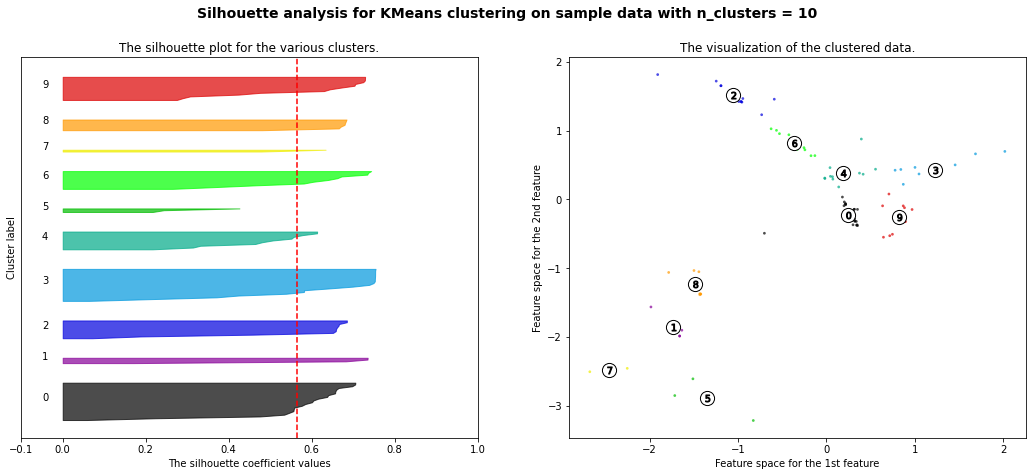

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **So as On the basis silhouette_score as well as & elbow method optimum number of cluster will be 3. So lets take optimum number of cluster = 3 and explore it further.**

In [ ]:
# So lets fit the model for n_cluster = 3
kmeans= KMeans(n_clusters = 3,init="k-means++")
kmeans.fit(new_df)
y_kmeans = kmeans.predict(new_df)
y_kmeans

array([0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 1], dtype=int32)

In [ ]:
# Different  metrics for kmeans Clustering Algorithem
silhouette_avg = silhouette_score(new_df,y_kmeans)
inertia = kmeans.inertia_
distortion = sum(np.min(cdist(new_df, kmeans.cluster_centers_,'euclidean'), axis=1)) / new_df.shape[0]
print("For n_clusters =", 3,
          "The average silhouette_score is :", silhouette_avg)
print("For n_clusters =", 3,
          "The inertia is :", inertia)
print("For n_clusters =", 3,
          "The distortion is :", distortion)

For n_clusters = 3 The average silhouette_score is : 0.5968079274777695
For n_clusters = 3 The inertia is : 40.851703557218606
For n_clusters = 3 The distortion is : 0.5603556754448701


In [ ]:
clust1['Cluster'] = y_kmeans

In [ ]:
clust1=clust1.reset_index()

In [ ]:
# So lets find out the number of restaurants in Each Cluster According K means Clustering Technique
clust1['Cluster'].value_counts()

2    66
0    22
1    16
Name: Cluster, dtype: int64

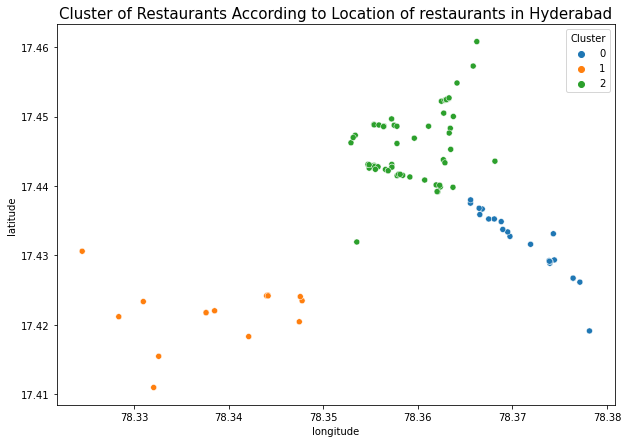

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=clust1, x='longitude', y = 'latitude', hue ='Cluster',palette ="tab10")
plt.title("Cluster of Restaurants According to Location of restaurants in Hyderabad", fontsize=15)
plt.show()

# **Hierachical Clustering**

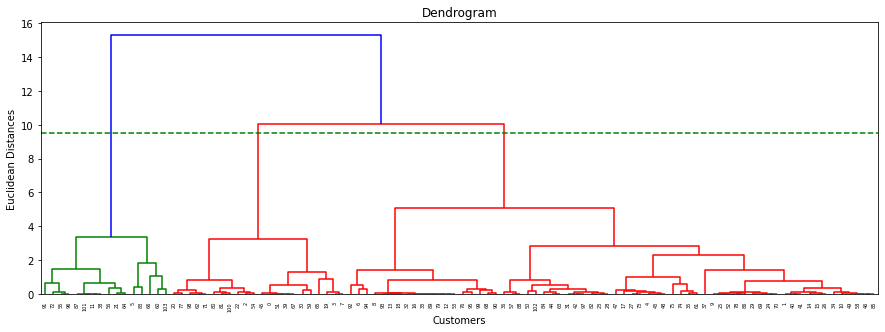

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(cluster, method = 'ward'))
plt.axhline(y=9.5, color="green", linestyle="--",label= 'Number of Cluster = 3')

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() 

# **So according to hierachichal Clustering as well optimum number of cluster will be 3.**

In [ ]:
# Fitting hierarchical clustering to the Restaurant Dataset
from sklearn.cluster import AgglomerativeClustering
model_hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
ypredicted_hc = model_hc.fit_predict(cluster)
ypredicted_hc

array([2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1])

In [ ]:
# Lets add Cluster label column in to Dataset
clust1['Cluster_Hc'] = ypredicted_hc

In [ ]:
clust1.head()

Name   latitude  longitude  Cluster  Cluster_Hc
0                 Beyond Flavours  17.428879  78.373961        0           2
1                        Paradise  17.442382   78.35658        2           0
2                        Flechazo  17.435255  78.368087        0           2
3  Shah Ghouse Hotel & Restaurant  17.426722  78.376416        0           2
4      Over The Moon Brew Company  17.440155  78.361936        2           0

In [ ]:
# So lets find out the number of restaurants in Each Cluster According K means Clustering Technique
clust1['Cluster_Hc'].value_counts()

0    66
2    22
1    16
Name: Cluster_Hc, dtype: int64

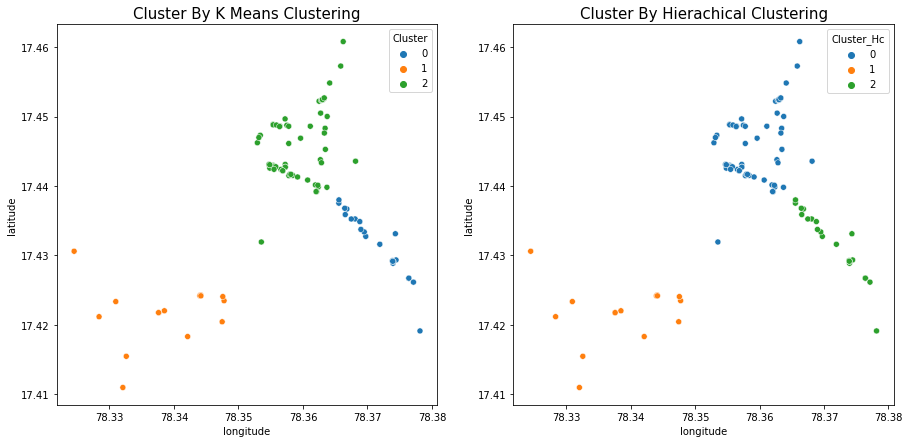

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
p=sns.scatterplot(ax=axes[0], data=clust1, x='longitude', y = 'latitude', hue ='Cluster',palette ="tab10")
p.set_title("Cluster By K Means Clustering", fontsize=15)
q=sns.scatterplot(ax=axes[1],data=clust1, x='longitude', y = 'latitude', hue ='Cluster_Hc',palette ="tab10")
q.set_title("Cluster By Hierachical Clustering", fontsize=15)
plt.show()

In [ ]:
# Let us define a function to convert the string of column to integer
def str_to_int(input_str):
  '''
  This function  converts the string format column elements to integer format
  '''
  result = int(float(input_str.replace(',','')))
  return result

In [ ]:
def str_to_list (text):
  return text.split(", ")

In [ ]:
review_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant reviews.csv')

In [ ]:
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
review_df.shape

(10000, 7)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
review_df.Review.isnull().sum()

45

In [ ]:
newreview_df= review_df[~review_df.Review.isnull()].reset_index() 

In [ ]:
newreview_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [ ]:
newreview_df.Rating.unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
newreview_df[newreview_df.Rating=='Like']

index                     Restaurant           Reviewer  \
7597   7601  The Old Madras Baking Company  Dhanasekar Kannan   

                                                 Review Rating  \
7597  One of the best pizzas to try. It served with ...   Like   

                       Metadata             Time  Pictures  
7597  12 Reviews , 21 Followers  5/18/2019 12:31         1

In [ ]:
# So Lets repalce the "Like" into Rating "5"
newreview_df.Rating = newreview_df.Rating.replace('Like', '5')

In [ ]:
# So lets convert Rating column from string to float Type format
newreview_df.Rating= newreview_df.Rating.str.replace(' ', '').astype(float)

In [ ]:
# So lets Convert Time column from string to datetime Format
newreview_df.Time = pd.to_datetime(newreview_df.Time)

In [ ]:
# Lets Separate Time and date from Time Coulmn
newreview_df['Date'] = pd.to_datetime(newreview_df['Time']).dt.date
newreview_df['Newtime'] = pd.to_datetime(newreview_df['Time']).dt.time


In [ ]:
# So lets Convert Date column from string to datetime Format
newreview_df['Date'] = pd.to_datetime(newreview_df['Date'])


In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       9955 non-null   int64         
 1   Restaurant  9955 non-null   object        
 2   Reviewer    9955 non-null   object        
 3   Review      9955 non-null   object        
 4   Rating      9955 non-null   float64       
 5   Metadata    9955 non-null   object        
 6   Time        9955 non-null   datetime64[ns]
 7   Pictures    9955 non-null   int64         
 8   Date        9955 non-null   datetime64[ns]
 9   Newtime     9955 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 777.9+ KB


In [ ]:
out = pd.DataFrame(newreview_df['Metadata'].str.split(',',1).tolist(),columns=['No_of_review','No_of_Follower'])
x=pd.DataFrame(out['No_of_review'].str.split(' ',1).tolist(),columns=['No_of_review','Review'])
newreview_df['No_of_review'] = x['No_of_review']

In [ ]:
out.No_of_Follower.isnull().sum()

1574

In [ ]:
out['No_of_Follower'].fillna(" 0 Follower", inplace = True)

In [ ]:
z=pd.DataFrame(out['No_of_Follower'].str.split(' ',2).tolist(),columns=['space','No_ofFollower','follower'])
newreview_df['No_of_Follower'] = z['No_ofFollower']

In [ ]:
# So lets convert No_of_Follower & No_of_review column from string to float Type format
newreview_df.No_of_review = newreview_df.No_of_review.str.replace(' ', '').astype(float)
newreview_df.No_of_Follower = newreview_df.No_of_Follower .str.replace(' ', '').astype(float)

In [ ]:
newreview_df.drop(['Time','Metadata',],axis =1 , inplace = True)

In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9955 non-null   int64         
 1   Restaurant      9955 non-null   object        
 2   Reviewer        9955 non-null   object        
 3   Review          9955 non-null   object        
 4   Rating          9955 non-null   float64       
 5   Pictures        9955 non-null   int64         
 6   Date            9955 non-null   datetime64[ns]
 7   Newtime         9955 non-null   object        
 8   No_of_review    9955 non-null   float64       
 9   No_of_Follower  9955 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 777.9+ KB


Text(0.5, 1.0, 'Rating Given By Number of Customer')

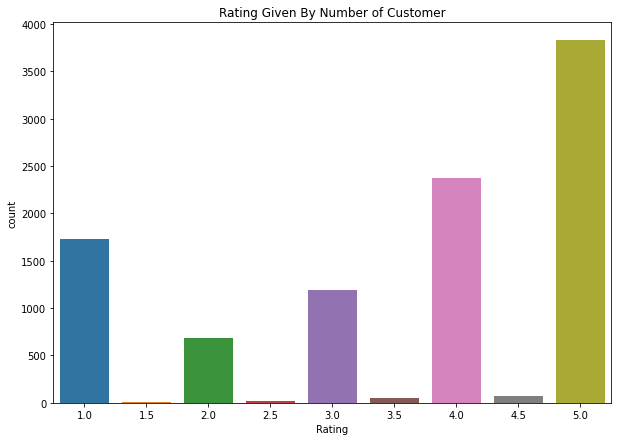

In [ ]:
plt.figure (figsize = (10,7))
sns.countplot(newreview_df.Rating)
plt.title("Rating Given By Number of Customer")

# **Sentiment Analysis**
## **Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context.**

In [ ]:
# Lets Create Function to Clean Review Text
def clean_review(review):
        '''
        Utility function to clean Review text by removing links, special characters
        using simple regex statements.
        '''
        review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review)
        review = review.lower()
    # split to array(default delimiter is " ")
        review = review.split()
    # in string array at ith row   
        review = [word for word in review if not word in set(stopwords.words('english'))]             
    # rejoin all string array elements
    # to create back into a string
        review = ' '.join(review)   
        return review
  

In [ ]:
def get_review_sentiment(review):
        '''
        Utility function to classify sentiment of passed Review
        using textblob's sentiment method
        '''
        # create TextBlob object of passed Review
        analysis = TextBlob(clean_review(review))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [ ]:
def getSubjectivity(review):
   return TextBlob(clean_review(review)).sentiment.subjectivity

In [ ]:
def getPolarity(review):
  return TextBlob(clean_review(review)).sentiment.polarity

In [ ]:
# Get Clean Review Column
newreview_df['clean_review'] = newreview_df['Review'].apply(clean_review )

In [ ]:
# Get Sentiment Polarity
newreview_df['Sentiment_Polarity'] = newreview_df['Review'].apply(getPolarity )


In [ ]:
# Get Sentiment Subjectivity
newreview_df['Sentiment_Subjectivity'] = newreview_df['Review'].apply(getSubjectivity )

In [ ]:
# Get Sentiment Analysis
newreview_df['Sentiment'] = newreview_df['Review'].apply(get_review_sentiment )

In [ ]:
newreview_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   
3  Soumen das and Arun was a great guy. Only beca...     5.0         0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         0   

        Date   Newtime  No_of_review  No_of_Follower  \
0 2019-05-25  15:54:00           1.0             2.0   
1 2019-05-25  14:20:00           3.0             2.0   
2 2019-05-24  22:54:00           2.0             3.0   
3 2019-05-24  22:11:00           1.0             1.0   
4 2019-05-24  21:37:00           3.0             2.0   

                                        clean_review  Sentiment_Polarity  \
0  ambience good food quite good saturday lunch c...            0.660000   
1  ambience good pleasant evening service prompt ...            0.708333   
2  must try great food great ambience thnx servic...            0.550000   
3  soumen das arun great guy behavior sincerety g...            0.750000   
4  food good ordered kodi drumsticks basket mutto...            0.560000   

   Sentiment_Subjectivity Sentiment  
0                0.720000  positive  
1                0.691667  positive  
2                0.675000  positive  
3                0.675000  positive  
4                0.540000  positive

In [ ]:
import seaborn as sns

# **Customer Sentiment Analysis**

Text(0.5, 1.0, 'Sentiment Polarity Vs Sentiment Subjectivity')

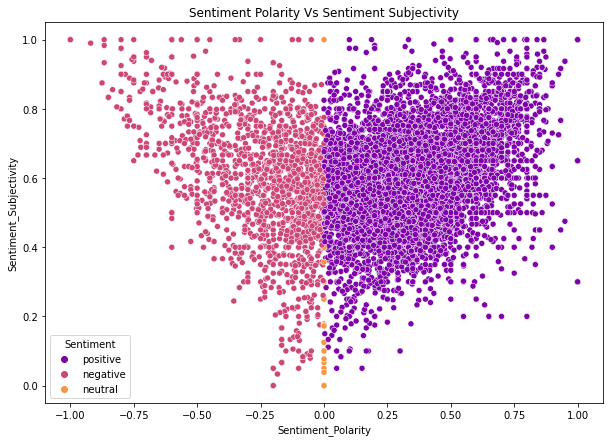

In [ ]:
# Sentiment Polarity Vs Sentiment Subjectivity
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                hue="Sentiment", palette="plasma",data=newreview_df)
plt.title('Sentiment Polarity Vs Sentiment Subjectivity')

## **1.Sentiment Polarity lies between [-1,1], -1 defines a negative sentiment, 1 defines a positive sentiment and 0 defines neutral sentiment.**

## **2. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.**


Text(0.5, 1.0, 'Sentiment Polarity Vs Sentiment Subjectivity w.r.to Rating')

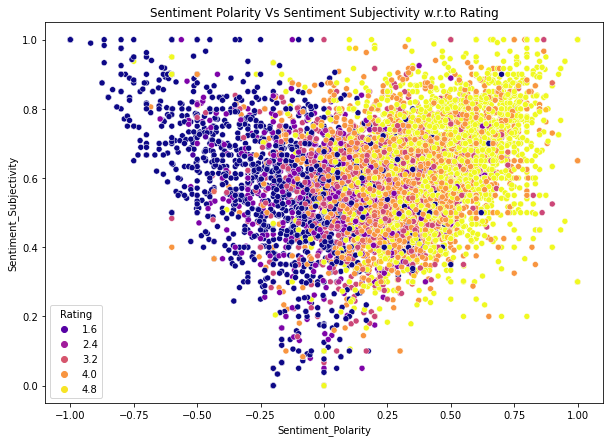

In [ ]:
# Sentiment Polarity Vs Sentiment Subjectivity with respective Rating
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity",
                hue="Rating", palette="plasma",data=newreview_df)
plt.title('Sentiment Polarity Vs Sentiment Subjectivity w.r.to Rating')

In [ ]:
A= newreview_df.Sentiment.value_counts()
A

positive    7624
negative    1835
neutral      496
Name: Sentiment, dtype: int64

In [ ]:
import seaborn as sns

# **Overall Customer Sentiment Based On Review**

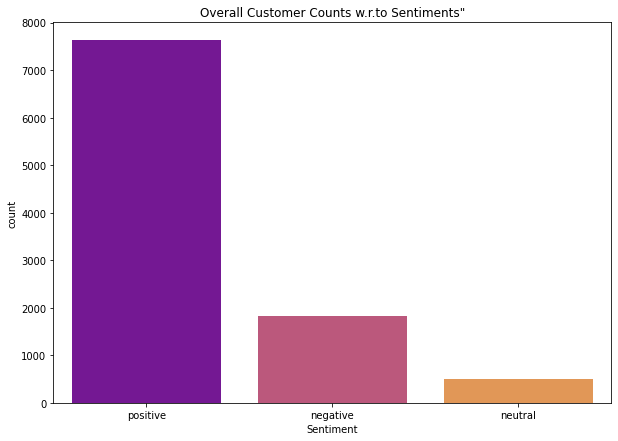

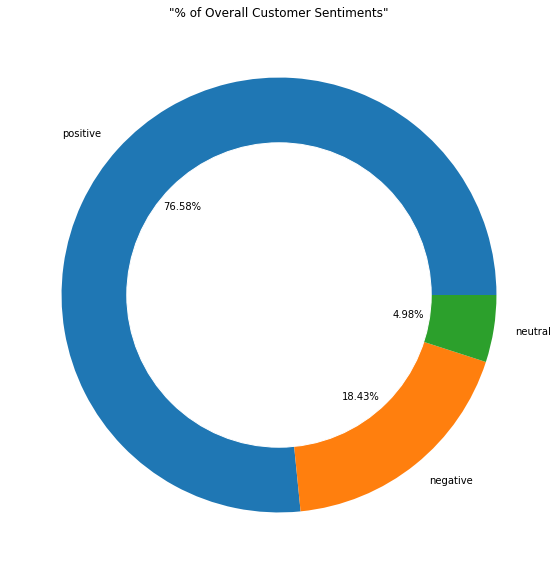

In [ ]:
# Overall Customer Sentiment Based On Review
plt.figure(figsize=(10,7))
plt.title('Overall Customer Counts w.r.to Sentiments"')
sns.countplot(data=newreview_df, x="Sentiment", palette="plasma")

#Lets see pie plot of Overall Customer Sentiment about there Experiance @ Zomato Restaurants
plt.figure(figsize=(10,10))
plt.pie( A ,labels=A.index,autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"% of Overall Customer Sentiments"')
plt.show()

In [ ]:
newreview_df.Restaurant.value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

In [ ]:
df = newreview_df.groupby(by =newreview_df.Restaurant)['Sentiment_Polarity','Sentiment_Subjectivity','Rating'].mean().sort_values(by=['Sentiment_Polarity'],ascending = False).reset_index()

## **Top 10 (Most Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

In [ ]:
df.rename(columns={'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity','Rating':'Average_Rating'}, inplace = True)
df

Restaurant  Mean_Sentiment_Polarity  \
0        AB's - Absolute Barbecues                 0.587395   
1                         Flechazo                 0.526417   
2   3B's - Buddies, Bar & Barbecue                 0.518821   
3                           B-Dubs                 0.497512   
4                   The Indi Grill                 0.482232   
..                             ...                      ...   
95                  Domino's Pizza                 0.071351   
96                             KFC                 0.062730   
97                  Asian Meal Box                 0.053010   
98                   Pakwaan Grand                 0.048103   
99                Hotel Zara Hi-Fi                -0.047401   

     Mean_Sentiment_Subjectivity  Average_Rating  
0                       0.715231        4.880000  
1                       0.661154        4.660000  
2                       0.684991        4.760000  
3                       0.644784        4.810000  
4                       0.608736        4.600000  
..                           ...             ...  
95                      0.578642        3.070707  
96                      0.544871        2.850000  
97                      0.519008        2.580000  
98                      0.591807        2.710000  
99                      0.554316        2.400000  

[100 rows x 4 columns]

Text(0.5, 1.0, 'Top 10 Restaurants in Hyderabad (Based On Customer Review)')

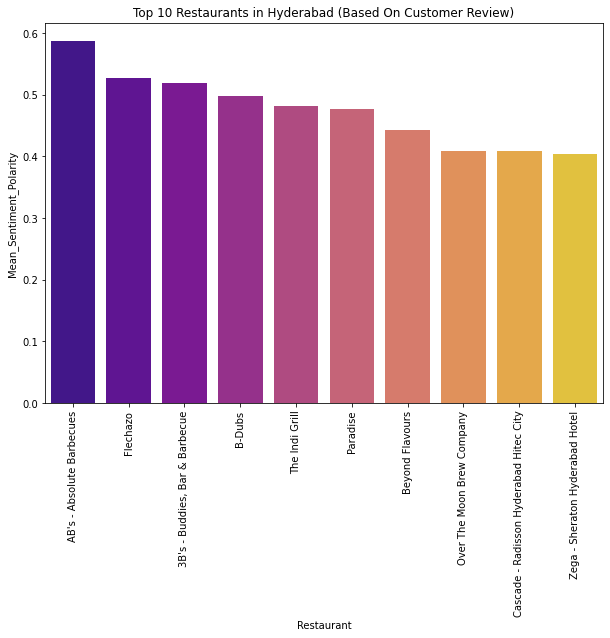

In [ ]:
# Top 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data= df.head(10), x="Restaurant",y='Mean_Sentiment_Polarity', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Restaurants in Hyderabad (Based On Customer Review)')

Text(0.5, 1.0, 'Average Ratings of Restaurants in Hyderabad')

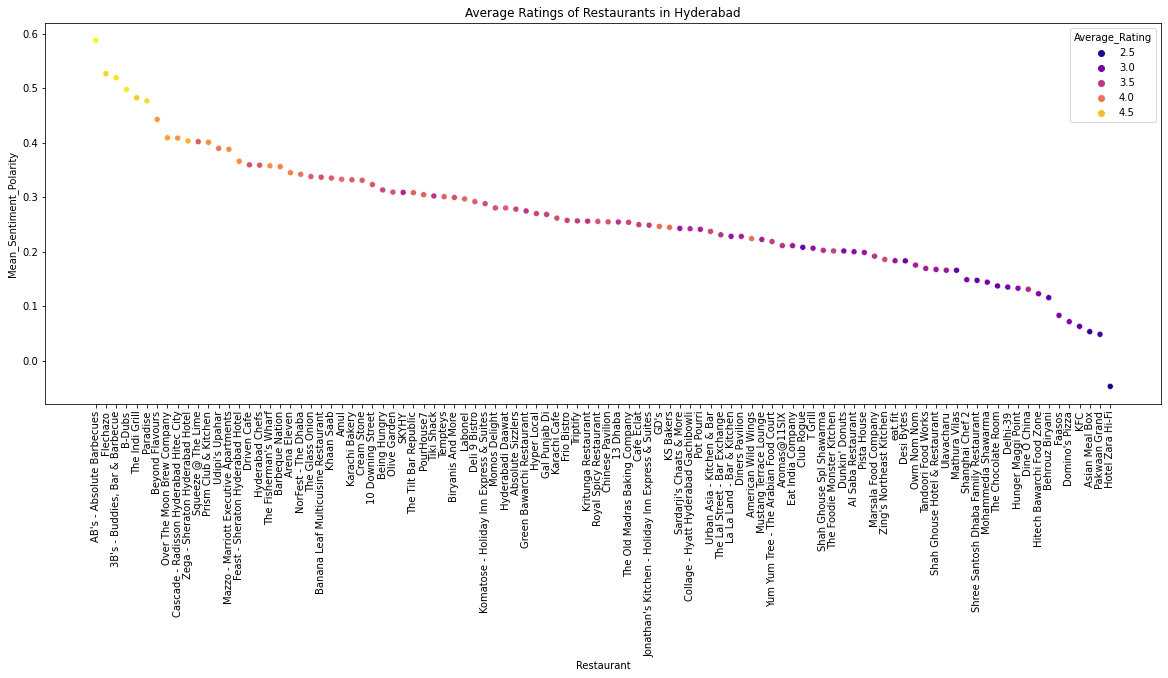

In [ ]:
# Lets find 'Average Ratings of Restaurants in Hyderabad'
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Polarity", x="Restaurant", hue ='Average_Rating',
                 palette="plasma",data=df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Average Ratings of Restaurants in Hyderabad')

## **So Restaurant AB's Absoulute Barbecues is the Most populer Restaurant in Hyderabad based on customer reviews and Average Rating. Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity around 0.59 & Minimum average Rating of Customers, Means Most of the Customer has given +ve review about the services provide by Restaurants.**

## **Worst 10 (Least Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

Text(0.5, 1.0, ' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

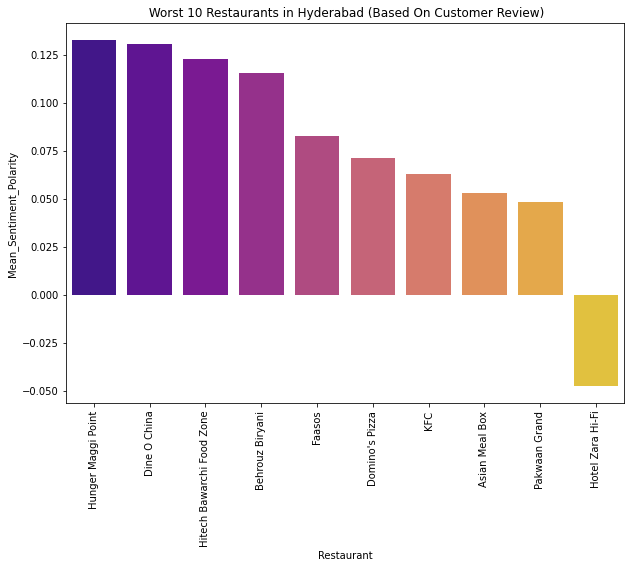

In [ ]:
# Worst 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=df.tail(10), x="Restaurant",y='Mean_Sentiment_Polarity', palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title(' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

## **So Restaurant Zara Hi Fi is the least populer restaurant in Hyderabad Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity -0.050, Means Most of the Customer has given -ve review about the services offered by Restaurant.**

In [ ]:
newreview_df.describe()

index       Rating     Pictures  No_of_review  No_of_Follower  \
count  9955.000000  9955.000000  9955.000000   9955.000000     9955.000000   
mean   4983.462883     3.600402     0.751984     24.006730      163.108086   
std    2882.460164     1.483565     2.575691     50.629274      620.153289   
min       0.000000     1.000000     0.000000      0.000000        0.000000   
25%    2489.500000     3.000000     0.000000      1.000000        1.000000   
50%    4978.000000     4.000000     0.000000      4.000000        7.000000   
75%    7469.500000     5.000000     0.000000     22.000000       63.000000   
max    9999.000000     5.000000    64.000000   1031.000000    13410.000000   

       Sentiment_Polarity  Sentiment_Subjectivity  
count         9955.000000             9955.000000  
mean             0.263653                0.582577  
std              0.364243                0.205551  
min             -1.000000                0.000000  
25%              0.025000                0.500000  
50%              0.300000                0.600000  
75%              0.528175                0.700000  
max              1.000000                1.000000

In [ ]:
newreview_df[newreview_df.No_of_review==1031]

index                            Restaurant         Reviewer  \
3123   3124                           Pista House  Anvesh Chowdary   
7293   7297                               Labonel  Anvesh Chowdary   
9163   9208  Collage - Hyatt Hyderabad Gachibowli  Anvesh Chowdary   

                                                 Review  Rating  Pictures  \
3123  Tried the zafrani 65 biryani and then butter c...     4.0         0   
7293  This place stays in the best 5 bakeries in the...     4.0         0   
9163  I don't expect how people are maintaining the ...     2.0         0   

           Date   Newtime  No_of_review  No_of_Follower  \
3123 2019-02-14  22:23:00        1031.0          1654.0   
7293 2016-10-27  00:42:00        1031.0          1654.0   
9163 2019-04-04  22:37:00        1031.0          1654.0   

                                           clean_review  Sentiment_Polarity  \
3123  tried zafrani 65 biryani butter chicken along ...            0.450000   
7293  place stays best 5 bakeries city chocolate cak...            0.491667   
9163  expect people maintaining place service pathet...           -0.094444   

      Sentiment_Subjectivity Sentiment  
3123                0.787500  positive  
7293                0.363889  positive  
9163                0.788889  negative

# **Top 10 Critics in The Market (Based on No of Follower)**

In [ ]:
# Top 10 Critics In The Industry who are having Maximum Number of Follower
critics= newreview_df.groupby(by='Reviewer')['No_of_review','No_of_Follower','Rating','Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by='No_of_Follower',ascending = False).reset_index()

In [ ]:
critics.rename(columns={'Reviewer': "Name of Critics" ,'Rating':'Mean_Rating',
                         'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace =True)
critics.head(10)

Name of Critics  No_of_review  No_of_Follower  Mean_Rating  \
0    Satwinder Singh         186.0        13410.00     3.666667   
1         Eat_vth_me          60.0        13320.00     5.000000   
2       Samar Sardar           8.0        11329.00     3.500000   
3  Foodies Hyderabad          31.0         9494.00     4.500000   
4         Aman Arora          30.0         7589.00     4.000000   
5             ASH&B2          98.0         6931.00     3.333333   
6      Hasanthi Mula          31.0         5879.00     3.000000   
7          #FOODPORN          35.0         5873.00     5.000000   
8        FooD HUNTer          63.0         5715.00     4.000000   
9        Food Nawabs         130.0         5532.25     4.000000   

   Mean_Sentiment_Polarity   Mean_Sentiment_Subjectivity  
0                 0.206382                      0.642743  
1                 0.135965                      0.587469  
2                 0.166964                      0.591964  
3                 0.287500                      0.698333  
4                 0.137500                      0.516667  
5                 0.220000                      0.759630  
6                 0.044444                      0.327778  
7                 0.491667                      0.666667  
8                 0.660000                      0.580000  
9                 0.205816                      0.580475

Text(0.5, 1.0, 'Top 10 Critics In The Industry (Based On No of Follower)')

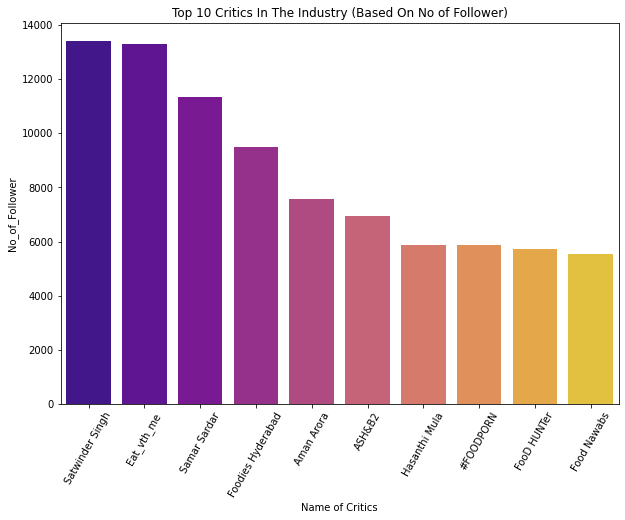

In [ ]:
# Top 10 Critics In The Industry who are having Maximum Number of Follower
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=critics.head(10), y='No_of_Follower', x='Name of Critics',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=60)
plt.title('Top 10 Critics In The Industry (Based On No of Follower)')

# **Top 10 Critics in The Market (Based on No of Reviews Given)**

In [ ]:
# Top 10 Critics In The Industry who have given maximum No of Reviews
critic= newreview_df.groupby(by='Reviewer')['No_of_review','No_of_Follower','Rating','Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by='No_of_review',ascending = False).reset_index()

In [ ]:
critic.rename(columns={'Reviewer': "Name of Critics" ,'Rating':'Mean_Rating',
                         'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace =True)
critic.head(10)

Name of Critics  No_of_review  No_of_Follower  \
0                           Anvesh Chowdary        1031.0          1654.0   
1                              ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ         685.0           794.0   
2                                    Abc098         665.0          2275.0   
3                     Mithun Ravindranathan         560.0          2863.0   
4  Mohd Zubair Ali (Hyderabad.Food.Diaries)         482.0          1688.0   
5                          Bhargava Krishna         472.0          1302.0   
6                           Epicurean Tales         452.0          2464.0   
7                                     Raghu         443.0          1016.0   
8                              Aarti Kamath         417.0          5451.0   
9                         Shrishail Deshnur         414.0          1047.0   

   Mean_Rating  Mean_Sentiment_Polarity   Mean_Sentiment_Subjectivity  
0     3.333333                 0.282407                      0.646759  
1     2.000000                 0.135450                      0.589153  
2     3.000000                 0.302778                      0.611111  
3     4.000000                 0.257302                      0.604802  
4     4.000000                 0.213417                      0.602381  
5     3.500000                 0.103030                      0.630303  
6     4.000000                 0.271236                      0.619533  
7     3.416667                 0.270342                      0.450965  
8     4.500000                 0.154167                      0.566250  
9     3.500000                 0.380556                      0.638889

Text(0.5, 1.0, 'Top 10 Critics In The Industry(Based On Max Reviews)')

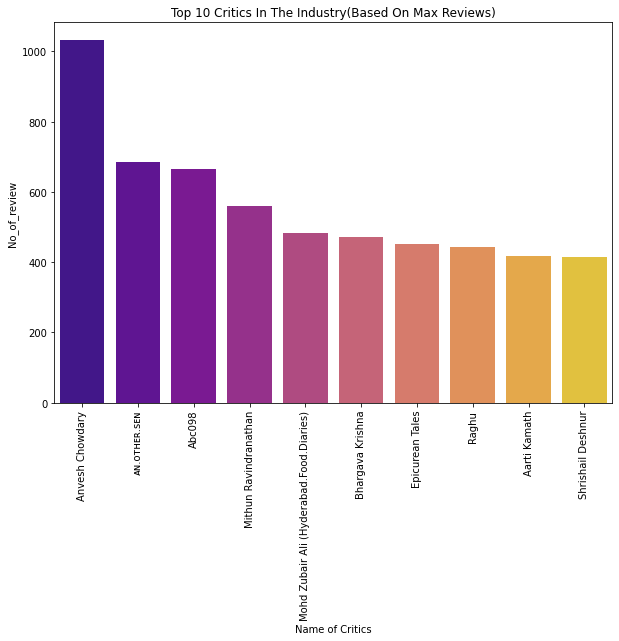

In [ ]:
# Top 10 Critics In The Industry who have given maximum No of Reviews
plt.figure(figsize=(10, 7))
plot=sns.barplot(data=critic.head(10), y='No_of_review', x='Name of Critics',palette="plasma")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Top 10 Critics In The Industry(Based On Max Reviews)')

In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   9955 non-null   int64         
 1   Restaurant              9955 non-null   object        
 2   Reviewer                9955 non-null   object        
 3   Review                  9955 non-null   object        
 4   Rating                  9955 non-null   float64       
 5   Pictures                9955 non-null   int64         
 6   Date                    9955 non-null   datetime64[ns]
 7   Newtime                 9955 non-null   object        
 8   No_of_review            9955 non-null   float64       
 9   No_of_Follower          9955 non-null   float64       
 10  clean_review            9955 non-null   object        
 11  Sentiment_Polarity      9955 non-null   float64       
 12  Sentiment_Subjectivity  9955 non-null   float64 

# **2. Sentiment Analysis using VADER**

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 8.4 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Lets Create function to get sentiments Analysis of the Review
def sentiment_Analysis(review):
    # Create a SentimentIntensityAnalyzer object.
    analyser = SentimentIntensityAnalyzer()
    # polarity_scores method of SentimentIntensityAnalyzer
    sentiment_dict = analyser.polarity_scores(review)   
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [ ]:
# Lets Create function to get sentiments Score of the Review
def sentiment_scores(review):
    # Create a SentimentIntensityAnalyzer object.
    analyser = SentimentIntensityAnalyzer()
    # polarity_scores method of SentimentIntensityAnalyzer
    sentiment_dict = analyser.polarity_scores(review)   
    return sentiment_dict['compound']

In [ ]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   9955 non-null   int64         
 1   Restaurant              9955 non-null   object        
 2   Reviewer                9955 non-null   object        
 3   Review                  9955 non-null   object        
 4   Rating                  9955 non-null   float64       
 5   Pictures                9955 non-null   int64         
 6   Date                    9955 non-null   datetime64[ns]
 7   Newtime                 9955 non-null   object        
 8   No_of_review            9955 non-null   float64       
 9   No_of_Follower          9955 non-null   float64       
 10  clean_review            9955 non-null   object        
 11  Sentiment_Polarity      9955 non-null   float64       
 12  Sentiment_Subjectivity  9955 non-null   float64 

In [ ]:
Review_df= newreview_df.copy()

In [ ]:
Review_df.drop(['Sentiment_Subjectivity','Sentiment_Polarity'], axis =1, inplace = True)

In [ ]:
Review_df['Sentiment_Score'] = Review_df['Review'].apply(sentiment_scores)
Review_df['Sentiment'] = Review_df['Review'].apply(sentiment_Analysis)

In [ ]:
Review_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0         0   
1  Ambience is too good for a pleasant evening. S...     5.0         0   
2  A must try.. great food great ambience. Thnx f...     5.0         0   
3  Soumen das and Arun was a great guy. Only beca...     5.0         0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0         0   

        Date   Newtime  No_of_review  No_of_Follower  \
0 2019-05-25  15:54:00           1.0             2.0   
1 2019-05-25  14:20:00           3.0             2.0   
2 2019-05-24  22:54:00           2.0             3.0   
3 2019-05-24  22:11:00           1.0             1.0   
4 2019-05-24  21:37:00           3.0             2.0   

                                        clean_review Sentiment  \
0  ambience good food quite good saturday lunch c...  Positive   
1  ambience good pleasant evening service prompt ...  Positive   
2  must try great food great ambience thnx servic...  Positive   
3  soumen das arun great guy behavior sincerety g...  Positive   
4  food good ordered kodi drumsticks basket mutto...  Positive   

   Sentiment_Score  
0           0.9676  
1           0.9360  
2           0.9186  
3           0.8591  
4           0.9245

In [ ]:
df1 = Review_df.groupby(by =Review_df.Restaurant)['Sentiment_Score','Rating'].mean().sort_values(by=['Sentiment_Score'],ascending = False).reset_index()

In [ ]:
df1.rename(columns={'Sentiment_Score' : 'Mean_Sentiment_Score','Rating':'Average_Rating'}, inplace = True)
df1.head(10)

Restaurant  Mean_Sentiment_Score  Average_Rating
0              AB's - Absolute Barbecues              0.912901           4.880
1                                 B-Dubs              0.893630           4.810
2                         The Indi Grill              0.868864           4.600
3        Zega - Sheraton Hyderabad Hotel              0.847623           4.450
4                               Paradise              0.840984           4.700
5  Mazzo - Marriott Executive Apartments              0.827176           4.190
6         3B's - Buddies, Bar & Barbecue              0.817134           4.760
7                               Flechazo              0.813130           4.660
8                   Prism Club & Kitchen              0.794556           4.215
9                  The Fisherman's Wharf              0.782935           4.220

Text(0.5, 1.0, 'Sentiment Analysis Resaturantwise')

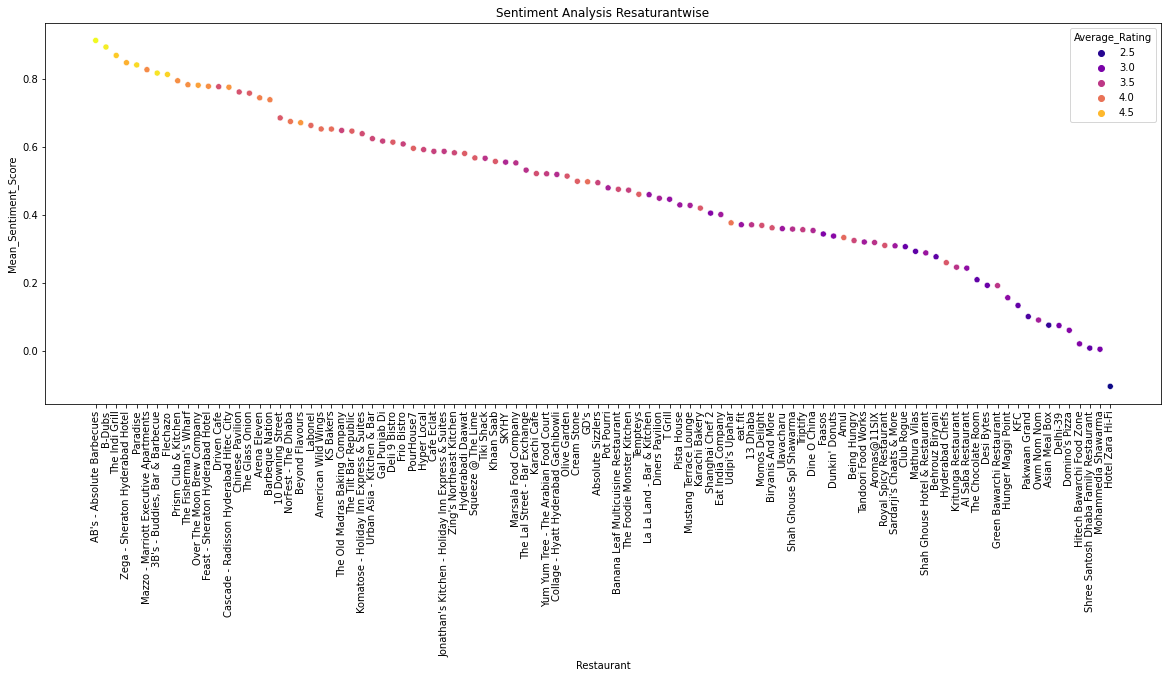

In [ ]:
# Lets find Sentiment Analysis Resaturantwise
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Score", x="Restaurant",
                hue="Average_Rating", palette="plasma",data=df1)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Sentiment Analysis Resaturantwise')

Text(0.5, 1.0, 'Average Ratings of Restaurants in Hyderabad')

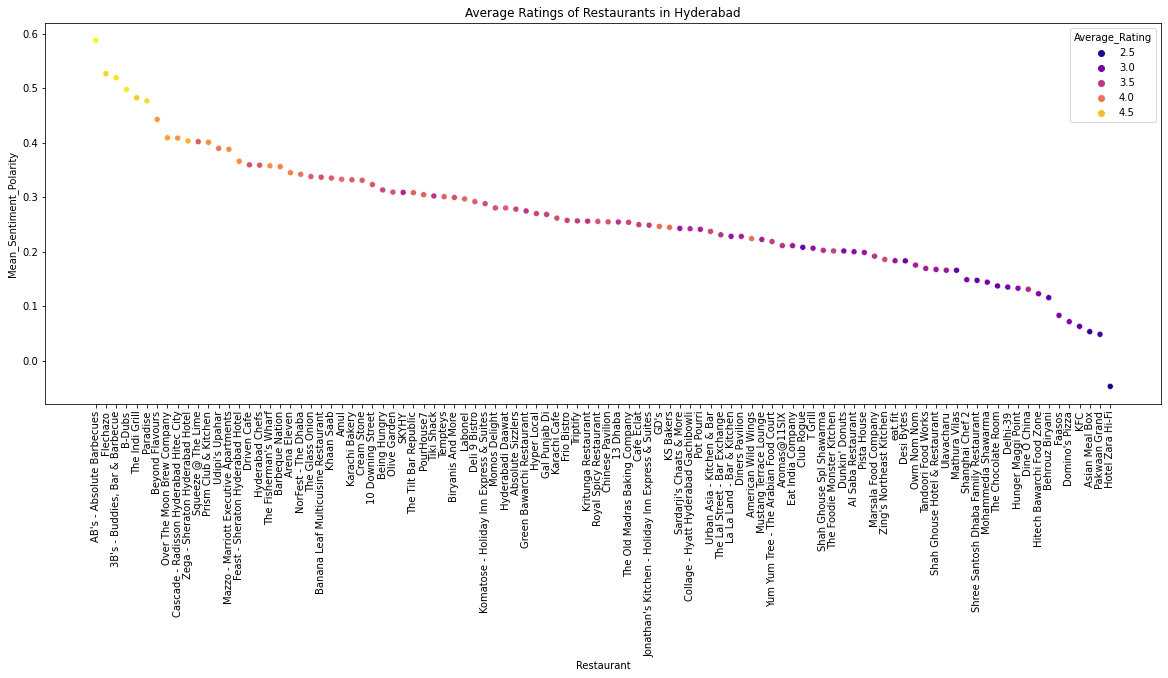

In [ ]:
# Lets find 'Average Ratings of Restaurants in Hyderabad'
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Mean_Sentiment_Polarity", x="Restaurant", hue ='Average_Rating',
                 palette="plasma",data=df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Average Ratings of Restaurants in Hyderabad')

Text(0.5, 1.0, 'Sentiment Analysis Resaturantwise')

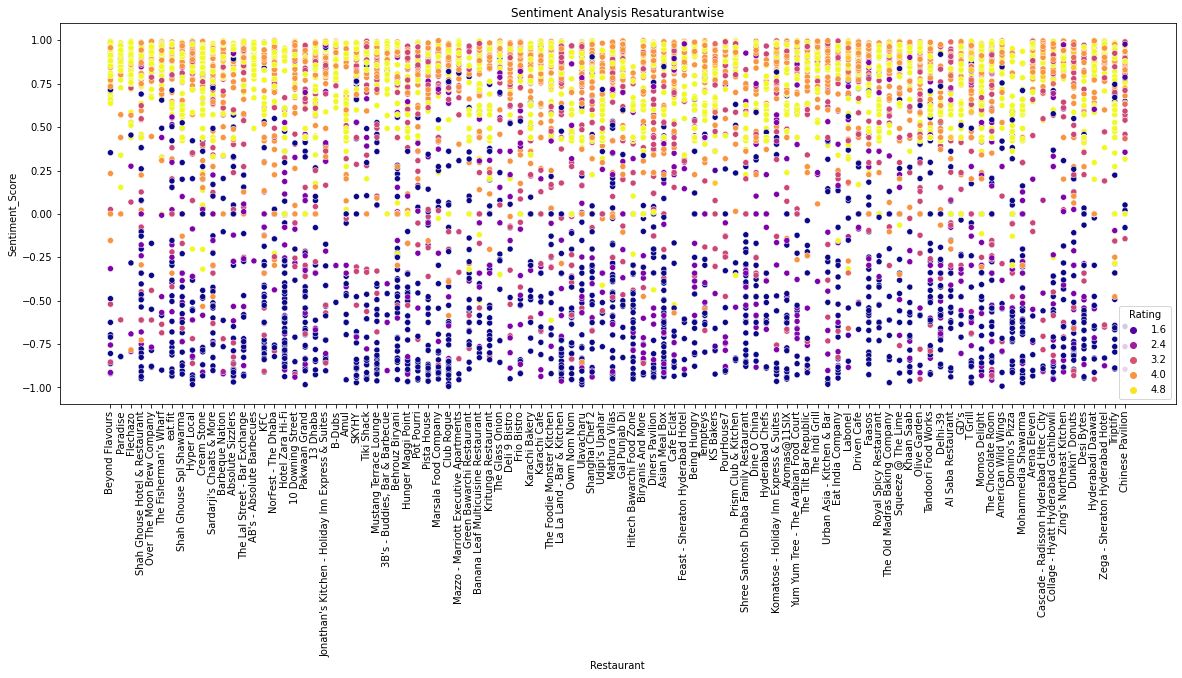

In [ ]:
# Lets find Sentiment Analysis Resaturantwise
plt.figure(figsize=(20,7))
plot = sns.scatterplot(y="Sentiment_Score", x="Restaurant",
                hue="Rating", palette="plasma",data=Review_df)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Sentiment Analysis Resaturantwise')

Text(0.5, 1.0, 'Sentiment Score Vs No of Reviews given by Custome')

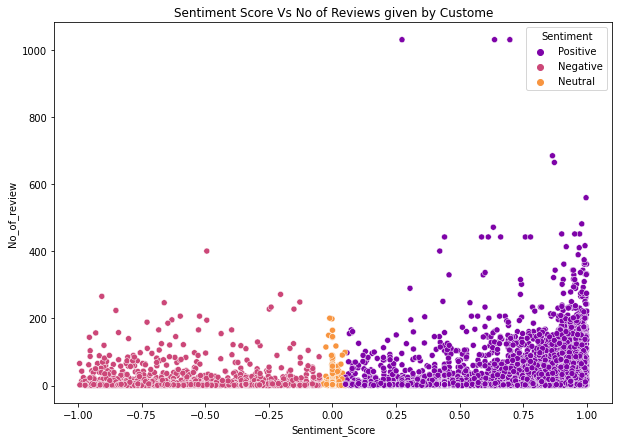

In [ ]:
# 'Sentiment Score Vs Customer Given No of Reviews
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Score", y="No_of_review",
                hue="Sentiment", palette="plasma",data=Review_df)
plt.title('Sentiment Score Vs No of Reviews given by Custome')

Text(0.5, 1.0, 'Sentiment Score Vs Customer Having No of Follower')

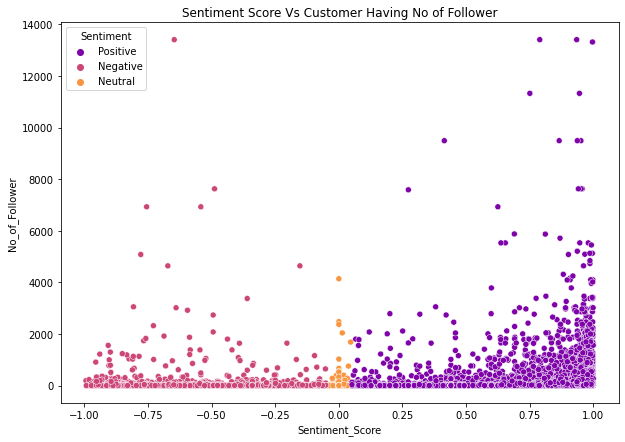

In [ ]:
# 'Sentiment Score Vs Customer Having No of Follower'
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Score", y="No_of_Follower",
                hue="Sentiment", palette="plasma",data=Review_df)
plt.title('Sentiment Score Vs Customer Having No of Follower')

Text(0.5, 1.0, 'Sentiment Score Vs No of Picture Shared By Customer')

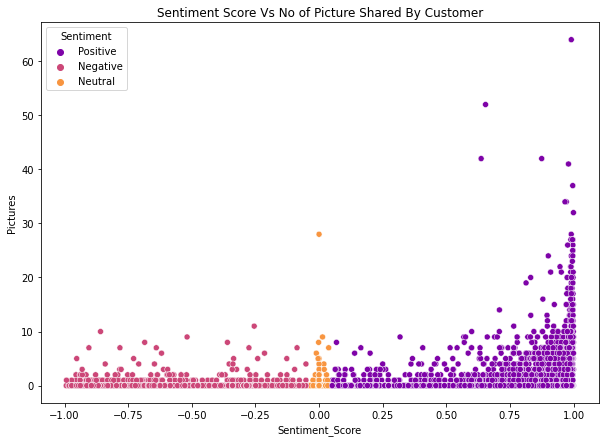

In [ ]:
# 'Sentiment Score Vs No of Picture Shared By Customer'
plt.figure(figsize=(10,7))
sns.scatterplot(x="Sentiment_Score", y="Pictures",
                hue="Sentiment", palette="plasma",data=Review_df)
plt.title('Sentiment Score Vs No of Picture Shared By Customer')

In [ ]:
from wordcloud import WordCloud

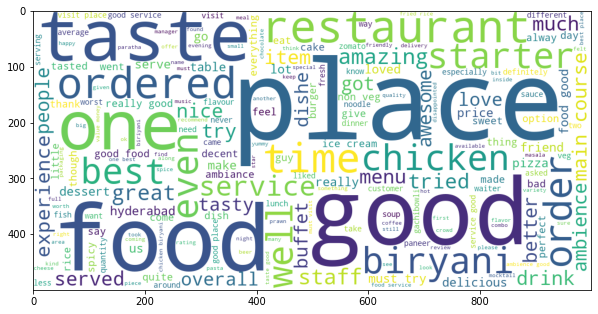

In [ ]:
 # Lets Findout the frequency or importance of the Words used by customer
word_cloud = ""
for row in newreview_df.clean_review:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.figure(figsize= (10,7))
plt.imshow(wordcloud)